# Customer Attrition

Customer attrition, also known as customer churn, customer turnover, or customer defection, is the loss of clients or customers. 

Original data: https://www.kaggle.com/becksddf/churn-in-telecoms-dataset/data

Alternative churn data: https://www.kaggle.com/blastchar/telco-customer-churn

Telephone service companies, Internet service providers, pay TV companies, insurance firms, and alarm monitoring services, often use customer attrition analysis and customer attrition rates as one of their key business metrics  because the cost of retaining an existing customer is far less than acquiring a new one. Companies from these sectors often have customer service branches which attempt to win back defecting clients, because recovered long-term customers can be worth much more to a company than newly recruited clients.

Companies usually make a distinction between voluntary churn and involuntary churn. Voluntary churn occurs due to a decision by the customer to switch to another company or service provider, involuntary churn occurs due to circumstances such as a customer's relocation to a long-term care facility, death, or the relocation to a distant location. In most applications, involuntary reasons for churn are excluded from the analytical models. Analysts tend to concentrate on voluntary churn, because it typically occurs due to factors of the company-customer relationship which companies control, such as how billing interactions are handled or how after-sales help is provided.

Predictive analytics  use churn prediction models that predict customer churn by assessing their propensity of risk to churn. Since these models generate a small prioritized list of potential defectors, they are effective at focusing customer retention marketing programs on the subset of the customer base who are most vulnerable to churn.

- <a href='#1'>1. Data</a>
    - <a href='#1.1'>1.1. Data Overview</a>
    - <a href='#1.2'>1.2. Data Manipulation</a>
- <a href='#2'>2. Exploratory Data Analysis</a>
    - <a href='#2.1'>2.1. Customer Attrition in Data</a>
    - <a href='#2.2'>2.2. Variable Distributions</a>
    - <a href='#2.3'>2.3. Variable Distributions by Attrition Type</a>
    - <a href='#2.4'>2.4. Scatter Plots</a>
    - <a href='#2.5'>2.5. 3D Visualization of tenue, MonthlyCharges and TotalCharges</a>
- <a href='#3'>3. Feature Engineering</a>
    - <a href='#3.1'>3.1. Target Encoding & One-hot Encoding</a>
    - <a href='#3.2'>3.2. Variable Summary</a>
    - <a href='#3.3'>3.3. Correlation Matrix</a>
    - <a href='#3.4'>3.4. Visualization with PCA</a>
- <a href='#4'>4. Feature Selection</a>
    - <a href='#4.1'>4.1. KS & Churn Detection Rate Univariate Filter</a>
    - <a href='#4.2'>4.2. Cross-Validated Recursive Feature Elimination</a>
- <a href='#5'>5. Model Building (Baseline)</a>
    - <a href='#5.1'>5.1. Target Encoded Features</a>
    - <a href='#5.2'>5.2. One-hot Encoded Features</a>
    - <a href='#5.3'>5.3. Model Performances Comparison</a>
- <a href='#6'>6. Model Tuning</a>
    - <a href='#6.1'>6.1. Logistic Regression</a>
    - <a href='#6.2'>6.2. Gradient Boosting Tree</a>
    - <a href='#6.3'>6.3. Neural Network</a>
    - <a href='#6.4'>6.4. Model Performances Comparison</a>
- <a href='#7'>7. Model Stacking</a>
    - <a href='#7.1'>7.1. Baseline Stacking Model</a>
    - <a href='#7.2'>7.2. Stacking Model Tuning</a>
- <a href='#8'>8. Model Evaluation on Hold-out Set</a>


In [1]:
#Importing libraries
import numpy as np
from datetime import datetime
start_time = datetime.now()

# Load Libraries
# %pip install plotly
# %pip install category_encoders
# %pip install yellowbrick
# %pip install imblearn
# %pip install graphviz
# %pip install lightgbm
# %pip install xgboost
# %pip install mlxtend
# %pip install vecstack
# %pip install treeinterpreter

# for me, I have to install graphviz via pip, the install via conda to get the paths right
# %conda install graphviz

# Basic Tools
import numpy as np
import pandas as pd
import math
import itertools as it
import warnings
warnings.filterwarnings("ignore")

# Visualization
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go
import plotly.express as px

# Classifiers
from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from lightgbm import LGBMClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import GradientBoostingClassifier

# Other machine learning tools
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score
from sklearn.feature_selection import RFECV
from sklearn.preprocessing import StandardScaler
import scipy.stats as sps 
from sklearn.decomposition import PCA

print('LOAD DURATION: ', datetime.now() - start_time) # about 2:00 + 3:00

LOAD DURATION:  0:00:02.004541


# <a id='1'>1.Data</a>

In [2]:
# telcom = pd.read_csv("telco_churn.csv")
telcom = pd.read_csv("WA_Fn-UseC_-Telco-Customer-Churn.csv")
#first few rows
telcom.head()

customerID  gender  SeniorCitizen Partner Dependents  tenure PhoneService  \
0  7590-VHVEG  Female              0     Yes         No       1           No   
1  5575-GNVDE    Male              0      No         No      34          Yes   
2  3668-QPYBK    Male              0      No         No       2          Yes   
3  7795-CFOCW    Male              0      No         No      45           No   
4  9237-HQITU  Female              0      No         No       2          Yes   

      MultipleLines InternetService OnlineSecurity  ... DeviceProtection  \
0  No phone service             DSL             No  ...               No   
1                No             DSL            Yes  ...              Yes   
2                No             DSL            Yes  ...               No   
3  No phone service             DSL            Yes  ...              Yes   
4                No     Fiber optic             No  ...               No   

  TechSupport StreamingTV StreamingMovies        Contract PaperlessBilling  \
0          No          No              No  Month-to-month              Yes   
1          No          No              No        One year               No   
2          No          No              No  Month-to-month              Yes   
3         Yes          No              No        One year               No   
4          No          No              No  Month-to-month              Yes   

               PaymentMethod MonthlyCharges  TotalCharges Churn  
0           Electronic check          29.85         29.85    No  
1               Mailed check          56.95        1889.5    No  
2               Mailed check          53.85        108.15   Yes  
3  Bank transfer (automatic)          42.30       1840.75    No  
4           Electronic check          70.70        151.65   Yes  

[5 rows x 21 columns]

## <a id='1.1'>1.1. Data Overview</a>

In [3]:
telcom.shape

(7043, 21)

In [4]:
# Summary statistics
summary = pd.DataFrame(index = telcom.columns)
summary['Data type'] = telcom.dtypes.values
summary['# Nonnull records'] = telcom.count().values
summary['# Non-zero records'] = telcom.astype(bool).sum(axis=0)
summary['% Populated'] = round(telcom.count()/telcom.shape[0]*100,2)
summary['# Unique values'] = telcom.nunique().values
summary['Mean'] = round(telcom.mean(),2)
summary['Std'] = round(telcom.std(),2)
# summary['Min'] = round(telcom.min(),2)
# summary['Max'] = round(telcom.max(),2)
summary

Data type  # Nonnull records  # Non-zero records  \
customerID          object               7043                7043   
gender              object               7043                7043   
SeniorCitizen        int64               7043                1142   
Partner             object               7043                7043   
Dependents          object               7043                7043   
tenure               int64               7043                7032   
PhoneService        object               7043                7043   
MultipleLines       object               7043                7043   
InternetService     object               7043                7043   
OnlineSecurity      object               7043                7043   
OnlineBackup        object               7043                7043   
DeviceProtection    object               7043                7043   
TechSupport         object               7043                7043   
StreamingTV         object               7043                7043   
StreamingMovies     object               7043                7043   
Contract            object               7043                7043   
PaperlessBilling    object               7043                7043   
PaymentMethod       object               7043                7043   
MonthlyCharges     float64               7043                7043   
TotalCharges        object               7043                7043   
Churn               object               7043                7043   

                  % Populated  # Unique values   Mean    Std  
customerID              100.0             7043    NaN    NaN  
gender                  100.0                2    NaN    NaN  
SeniorCitizen           100.0                2   0.16   0.37  
Partner                 100.0                2    NaN    NaN  
Dependents              100.0                2    NaN    NaN  
tenure                  100.0               73  32.37  24.56  
PhoneService            100.0                2    NaN    NaN  
MultipleLines           100.0                3    NaN    NaN  
InternetService         100.0                3    NaN    NaN  
OnlineSecurity          100.0                3    NaN    NaN  
OnlineBackup            100.0                3    NaN    NaN  
DeviceProtection        100.0                3    NaN    NaN  
TechSupport             100.0                3    NaN    NaN  
StreamingTV             100.0                3    NaN    NaN  
StreamingMovies         100.0                3    NaN    NaN  
Contract                100.0                3    NaN    NaN  
PaperlessBilling        100.0                2    NaN    NaN  
PaymentMethod           100.0                4    NaN    NaN  
MonthlyCharges          100.0             1585  64.76  30.09  
TotalCharges            100.0             6531    NaN    NaN  
Churn                   100.0                2    NaN    NaN

## <a id='1.2'>1.2. Data Manipulation</a>

In [5]:
# convert 'TotalCharges' to numeric variable
telcom['TotalCharges'] = pd.to_numeric(telcom.TotalCharges, errors = 'coerce')

In [6]:
#Separating id, target, catagorical and numerical columns
Id_col     = ["customerID"]
target_col = ["Churn"]
num_cols = ['tenure', 'MonthlyCharges', 'TotalCharges']
cat_cols = [col for col in telcom.columns if col not in Id_col+target_col+num_cols]

In [7]:
# inspected data for NA-s
telcom.isna().sum()

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

In [8]:
# decided to impute NA-s based on the mean total charges for combinations of gender, senior citizen & partner
groupbies = telcom.groupby(['gender','SeniorCitizen','Partner'])['TotalCharges'].mean().reset_index()
for i in range(telcom.shape[0]):
    if np.isnan(telcom.TotalCharges[i]):
        telcom.loc[i, 'TotalCharges'] = groupbies[(groupbies.gender == telcom.iloc[i].gender) & 
                                                   (groupbies.SeniorCitizen == telcom.iloc[i].SeniorCitizen) & 
                                                   (groupbies.Partner == telcom.loc[i].Partner)].iloc[0,-1]

In [9]:
# set categorical columns to type object and print possible values
for col in cat_cols+target_col:
    telcom[col] = telcom[col].astype(str)
    print(col, telcom[col].unique())

gender ['Female' 'Male']
SeniorCitizen ['0' '1']
Partner ['Yes' 'No']
Dependents ['No' 'Yes']
PhoneService ['No' 'Yes']
MultipleLines ['No phone service' 'No' 'Yes']
InternetService ['DSL' 'Fiber optic' 'No']
OnlineSecurity ['No' 'Yes' 'No internet service']
OnlineBackup ['Yes' 'No' 'No internet service']
DeviceProtection ['No' 'Yes' 'No internet service']
TechSupport ['No' 'Yes' 'No internet service']
StreamingTV ['No' 'Yes' 'No internet service']
StreamingMovies ['No' 'Yes' 'No internet service']
Contract ['Month-to-month' 'One year' 'Two year']
PaperlessBilling ['Yes' 'No']
PaymentMethod ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
Churn ['No' 'Yes']


In [10]:
# column TotalCharges cannot be directly cast to float type, define a function to find out why
def isFloat(var):
    """Check if a variable can be cast to type float"""
    try:
        var = float(var)
        return True
    except:
        return False

In [11]:
# there are blank values in this column
telcom['TotalCharges'][telcom['TotalCharges'].apply(isFloat)==False].tolist()

[]

In [12]:
def cast_float(var):
    """
    Cast a variable to type float.
    If the variable cannot be casted to type float, return nan.
    """
    try:
        var = float(var)
        return var
    except:
        return np.nan

In [13]:
# cast TotalCharge to type float and print statistics for numerical variables
# taking a closer look at the 11 missing values
# these 11 records are the only entries with 0 in the tenure (month of subscription) column
# it can be observed that TotalCharges is very close to MonthlyCharges times tenure
# thus we can set TotalCharges to 0
telcom['TotalCharges'] = telcom['TotalCharges'].apply(cast_float).astype(float)
telcom[telcom['TotalCharges'].isnull()][['tenure','MonthlyCharges','TotalCharges']]

Empty DataFrame
Columns: [tenure, MonthlyCharges, TotalCharges]
Index: []

In [14]:
telcom[telcom['tenure']==0].shape

(11, 21)

In [15]:
telcom['TotalCharges'] = telcom['TotalCharges'].fillna(0)
telcom[num_cols].describe()

tenure  MonthlyCharges  TotalCharges
count  7043.000000     7043.000000   7043.000000
mean     32.371149       64.761692   2283.882081
std      24.559481       30.090047   2265.156206
min       0.000000       18.250000     18.800000
25%       9.000000       35.500000    402.225000
50%      29.000000       70.350000   1400.550000
75%      55.000000       89.850000   3786.600000
max      72.000000      118.750000   8684.800000

In [16]:
#Separating churn and non churn customers
churn     = telcom[telcom['Churn'] == 'Yes']
not_churn = telcom[telcom['Churn'] == 'No']
rate = len(churn) / len(telcom)
print('Overall churn rate is', rate)

Overall churn rate is 0.2653698707936959


In [17]:
print("churn", churn.shape)
print("not churn", not_churn.shape)

churn (1869, 21)
not churn (5174, 21)


# <a id='2'>2. Exploratory Data Analysis</a>

## <a id='2.1'>2.1. Customer Attrition in Data</a>

(array([0, 1]), <a list of 2 Text major ticklabel objects>)

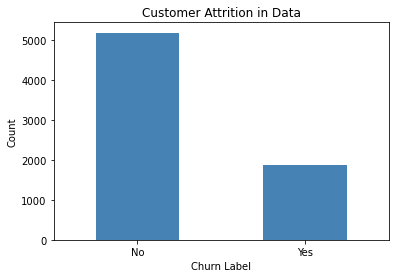

In [18]:
ssn = telcom['Churn'].value_counts().plot(kind='bar',color = "steelblue")
plt.xlabel('Churn Label')
plt.ylabel('Count')
plt.title('Customer Attrition in Data')
plt.xticks(rotation=360)

## <a id='2.2'>2.2. Variable Distributions </a>

###  <a id='2.2.1'> 2.2.1. Categorial Variable Distributions </a>

In [19]:
# Bar chart for categorical variable
def plot_cat(ax, cat):
    """Plot count bar chart for categorical variables."""
    data = telcom[cat].value_counts().values
    heads = telcom[cat].value_counts().index.tolist()
    
    # split into two lines if the category name is too long
    long = [i for i, h in enumerate(heads) if len(h.split())>=4 or len(h)>=20]
    for i in long:
        head = heads[i].split()
        heads[i] = ' '.join(head[:2]) + '\n' + ' '.join(head[2:])
        
    ax.bar(heads, data, color = "steelblue")
    ax.set_xticklabels(heads, fontsize = 18)
    ax.set_ylabel('Count', fontsize = 18)
    ax.set_title('Distribution of '+cat.title(), fontsize=24)

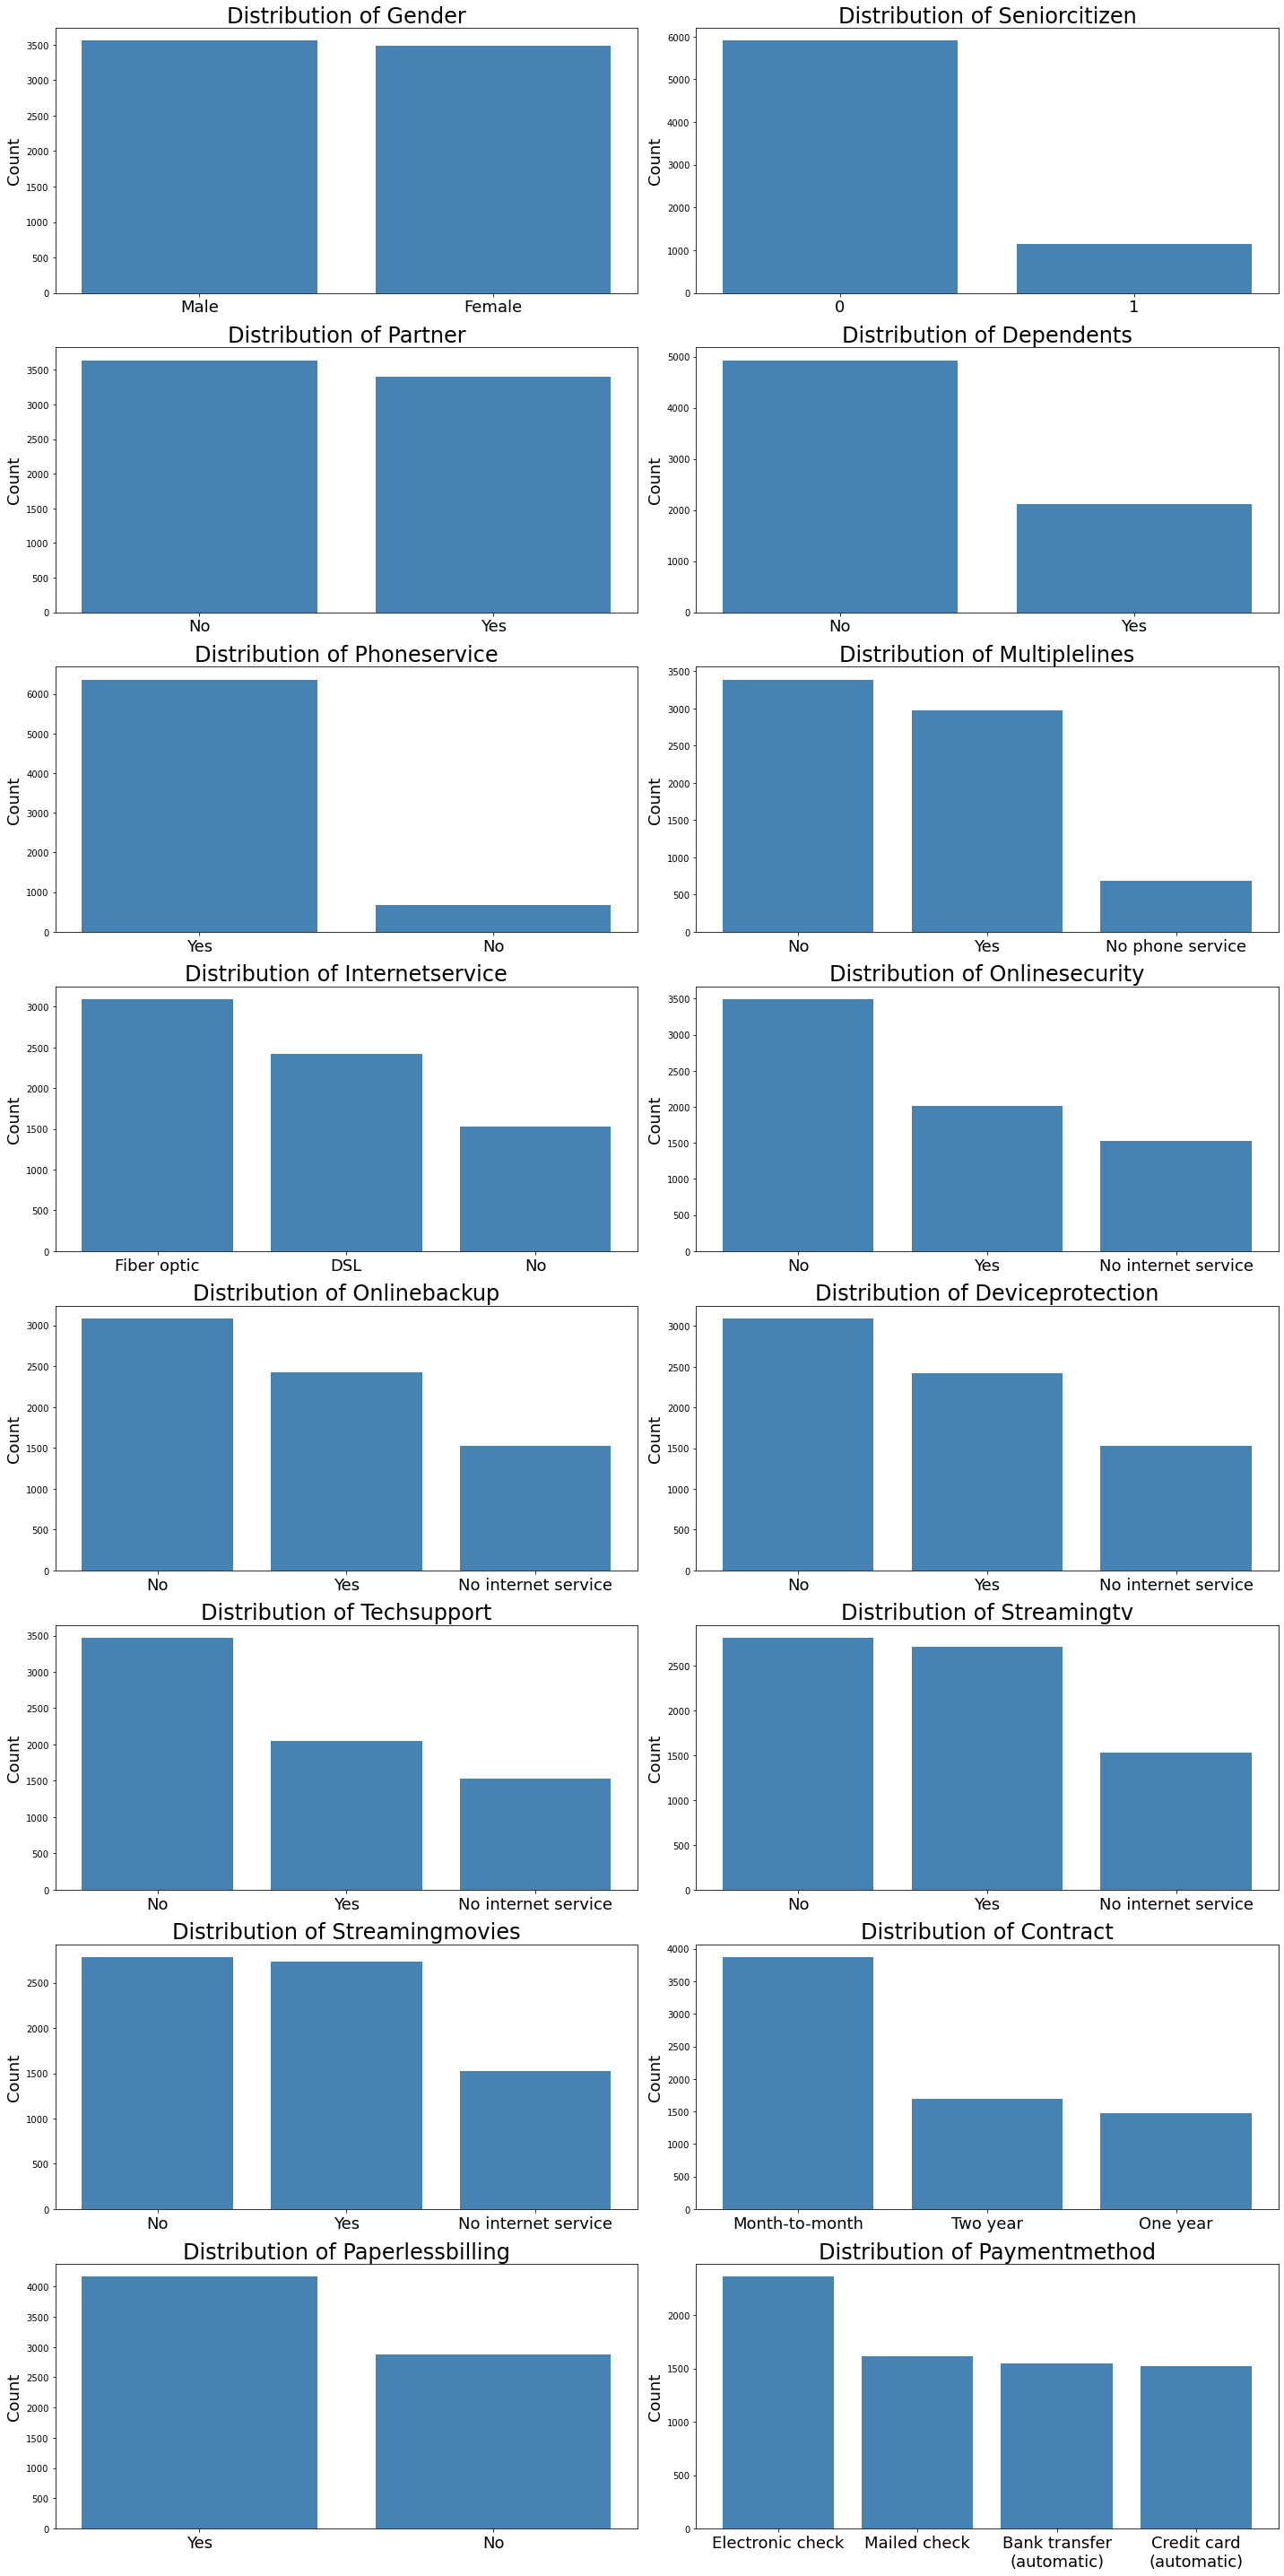

In [20]:
n_col=2
n_row=int(math.ceil(len(cat_cols)/n_col))

fig, ax_arr = plt.subplots(nrows = n_row, ncols = n_col, figsize = (20,n_row*5))
for i, cat in enumerate(cat_cols):
    i_row=i//n_col
    i_col=i%n_col
    plot_cat(ax_arr[i_row,i_col], cat)

plt.subplots_adjust(wspace=0.2)
plt.tight_layout() 

###  <a id='2.2.2'> 2.2.2. Numerical Variable Distributions </a>

In [21]:
def plot_num(num):
    """Plot histogram for numerical variables."""
    bins = min(30,telcom[num].nunique())
    plt.hist(telcom[num],bins = bins)
    plt.xlabel(num.title(), fontsize = 15)
    plt.ylabel('Count', fontsize = 15)
    if max(telcom[num].value_counts()) - min(telcom[num].value_counts())>1000:
        plt.yscale('log')
        plt.ylabel('Count (log)', fontsize = 15)
    plt.title('Distribution of '+num.title(), fontsize = 20) 
    plt.show()

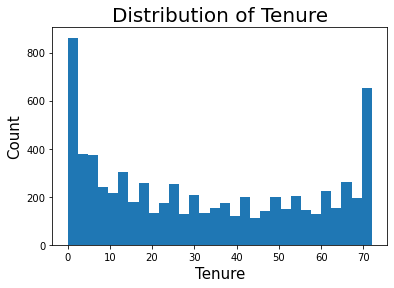

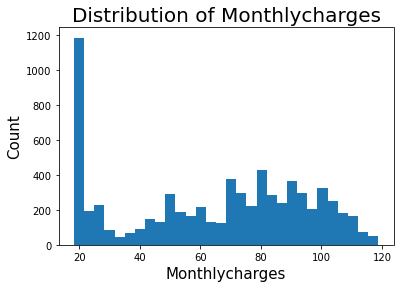

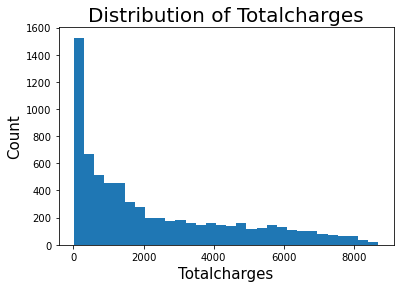

In [22]:
for num in num_cols:
    plot_num(num)

## <a id='2.3'>2.3. Variable Distributions by Attrition Type</a>

###  <a id='2.3.1'> 2.3.1. Categorial Fields Distributions </a>

In [23]:
def barchart(cat):
    """Plot distribution bar chart (percentage) by attrition type for categorical variables."""
    trace1 = go.Bar(x = churn[cat].value_counts().index,
                    y = churn[cat].value_counts()/len(churn)*100,
                    name = "Churn Customers")
    trace2 = go.Bar(x = not_churn[cat].value_counts().index,
                    y = not_churn[cat].value_counts()/len(not_churn)*100,
                    name = "Non Churn Customers")
    data = [trace1, trace2]
    layout = go.Layout(dict(title =cat.title() + " Distribution by Attrition Type",
                                plot_bgcolor  = "rgb(243,243,243)",
                                paper_bgcolor = "rgb(243,243,243)",
                                xaxis = dict(gridcolor = 'rgb(255, 255, 255)',
                                                 title = cat,
                                                 zerolinewidth=1,
                                                 ticklen=5,
                                                 gridwidth=2
                                                ),
                                yaxis = dict(gridcolor = 'rgb(255, 255, 255)',
                                                 title = "percent",
                                                 zerolinewidth=1,
                                                 ticklen=5,
                                                 gridwidth=2
                                                ),
                               )
                          )
    fig  = go.Figure(data=data,layout=layout)
    py.iplot(fig)

In [24]:
for cat in cat_cols:
    barchart(cat)

###  <a id='2.3.2'> 2.3.2. Numerical Variable Distributions </a>

In [25]:
def histogram(column) :
    """Plot histogram (percentage) by attrition type for numerical variables."""
    trace1 = go.Histogram(x  = churn[column],
                          histnorm= "percent",
                          name = "Churn Customers",
                          marker = dict(line = dict(width = .5,
                                                    color = "black"
                                                    )
                                        ),
                         opacity = .9 
                         ) 
    
    trace2 = go.Histogram(x  = not_churn[column],
                          histnorm = "percent",
                          name = "Non Churn Customers",
                          marker = dict(line = dict(width = .5,
                                              color = "black"
                                             )
                                 ),
                          opacity = .9
                         )
    
    data = [trace1,trace2]
    layout = go.Layout(dict(title =column.title() + " Distribution by Attrition Type",
                            plot_bgcolor  = "rgb(243,243,243)",
                            paper_bgcolor = "rgb(243,243,243)",
                            xaxis = dict(gridcolor = 'rgb(255, 255, 255)',
                                             title = column,
                                             zerolinewidth=1,
                                             ticklen=5,
                                             gridwidth=2
                                            ),
                            yaxis = dict(gridcolor = 'rgb(255, 255, 255)',
                                             title = "percent",
                                             zerolinewidth=1,
                                             ticklen=5,
                                             gridwidth=2
                                            ),
                           )
                      )
    fig  = go.Figure(data=data,layout=layout)
    py.iplot(fig)

In [26]:
for i in num_cols :
    if i != 'number vmail messages':
        histogram(i)

## <a id='2.4'> 2.4. Scatter Plots </a>

In [27]:
fig = px.scatter_matrix(telcom,dimensions=num_cols,color="Churn")
fig.layout.update(width = 950, height = 850)
fig.show()

## <a id='2.5'> 2.5. 3D Visualization of tenue, MonthlyCharges and TotalCharges </a>

In [28]:
def plot_3d(group):
    """Plot 3D visualization for a group of three variables."""
    trace1 = go.Scatter3d(x = churn[group[0]],
                      y = churn[group[1]],
                      z = churn[group[2]],
                      mode = "markers",
                      name = "Churn customers",
                      text = "Id : " + churn["customerID"],
                      marker = dict(size = 1,color = "red")
                     )
    trace2 = go.Scatter3d(x = not_churn[group[0]],
                      y = not_churn[group[1]],
                      z = not_churn[group[2]],
                      name = "Non churn customers",
                      text = "Id : " + not_churn["customerID"],
                      mode = "markers",
                      marker = dict(size = 1,color= "green")
                     )



    layout = go.Layout(dict(title = group[0].capitalize()+', '+group[1]+', and '+group [2]+" by Attrition Type",
                        scene = dict(camera = dict(up=dict(x= 0 , y=0, z=0),
                                                   center=dict(x=0, y=0, z=0),
                                                   eye=dict(x=1.25, y=1.25, z=1.25)),
                                     xaxis  = dict(title = group[0],
                                                   gridcolor='rgb(255, 255, 255)',
                                                   zerolinecolor='rgb(255, 255, 255)',
                                                   showbackground=True,
                                                   backgroundcolor='rgb(230, 230,230)'),
                                     yaxis  = dict(title = group[1],
                                                   gridcolor='rgb(255, 255, 255)',
                                                   zerolinecolor='rgb(255, 255, 255)',
                                                   showbackground=True,
                                                   backgroundcolor='rgb(230, 230,230)'
                                                  ),
                                     zaxis  = dict(title = group[2],
                                                   gridcolor='rgb(255, 255, 255)',
                                                   zerolinecolor='rgb(255, 255, 255)',
                                                   showbackground=True,
                                                   backgroundcolor='rgb(230, 230,230)'
                                                  )
                                    ),
                        height = 700,
                       )
                  )
                  

    data = [trace1,trace2]
    fig  = go.Figure(data = data,layout = layout)
    py.iplot(fig)

In [29]:
group_list = [['tenure','MonthlyCharges', 'TotalCharges']]

for group in group_list:
    plot_3d(group)

# <a id='3'> 3. Feature Engineering </a>

## 3.0 First build some new variables

In [30]:
telcom.shape

(7043, 21)

In [31]:
telcom.head().transpose()

0             1               2  \
customerID              7590-VHVEG    5575-GNVDE      3668-QPYBK   
gender                      Female          Male            Male   
SeniorCitizen                    0             0               0   
Partner                        Yes            No              No   
Dependents                      No            No              No   
tenure                           1            34               2   
PhoneService                    No           Yes             Yes   
MultipleLines     No phone service            No              No   
InternetService                DSL           DSL             DSL   
OnlineSecurity                  No           Yes             Yes   
OnlineBackup                   Yes            No             Yes   
DeviceProtection                No           Yes              No   
TechSupport                     No            No              No   
StreamingTV                     No            No              No   
StreamingMovies                 No            No              No   
Contract            Month-to-month      One year  Month-to-month   
PaperlessBilling               Yes            No             Yes   
PaymentMethod     Electronic check  Mailed check    Mailed check   
MonthlyCharges               29.85         56.95           53.85   
TotalCharges                 29.85        1889.5          108.15   
Churn                           No            No             Yes   

                                          3                 4  
customerID                       7795-CFOCW        9237-HQITU  
gender                                 Male            Female  
SeniorCitizen                             0                 0  
Partner                                  No                No  
Dependents                               No                No  
tenure                                   45                 2  
PhoneService                             No               Yes  
MultipleLines              No phone service                No  
InternetService                         DSL       Fiber optic  
OnlineSecurity                          Yes                No  
OnlineBackup                             No                No  
DeviceProtection                        Yes                No  
TechSupport                             Yes                No  
StreamingTV                              No                No  
StreamingMovies                          No                No  
Contract                           One year    Month-to-month  
PaperlessBilling                         No               Yes  
PaymentMethod     Bank transfer (automatic)  Electronic check  
MonthlyCharges                         42.3              70.7  
TotalCharges                        1840.75            151.65  
Churn                                    No               Yes

In [32]:
telcom.describe()

tenure  MonthlyCharges  TotalCharges
count  7043.000000     7043.000000   7043.000000
mean     32.371149       64.761692   2283.882081
std      24.559481       30.090047   2265.156206
min       0.000000       18.250000     18.800000
25%       9.000000       35.500000    402.225000
50%      29.000000       70.350000   1400.550000
75%      55.000000       89.850000   3786.600000
max      72.000000      118.750000   8684.800000

In [33]:
## Creating 2 More Variable
telcom.loc[:,'Non-Protection']=1 
telcom.loc[(telcom['OnlineBackup']!='No') | (telcom['DeviceProtection']!='No') | (telcom['TechSupport']!='No'),'Non-Protection']=0

telcom['TotalServices'] = (telcom[['PhoneService', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies']]== 'Yes').sum(axis=1)

In [34]:
num_cols = num_cols + ['Non-Protection','TotalServices']
num_cols

['tenure', 'MonthlyCharges', 'TotalCharges', 'Non-Protection', 'TotalServices']

In [35]:
telcom.describe()

tenure  MonthlyCharges  TotalCharges  Non-Protection  \
count  7043.000000     7043.000000   7043.000000     7043.000000   
mean     32.371149       64.761692   2283.882081        0.223626   
std      24.559481       30.090047   2265.156206        0.416704   
min       0.000000       18.250000     18.800000        0.000000   
25%       9.000000       35.500000    402.225000        0.000000   
50%      29.000000       70.350000   1400.550000        0.000000   
75%      55.000000       89.850000   3786.600000        0.000000   
max      72.000000      118.750000   8684.800000        1.000000   

       TotalServices  
count    7043.000000  
mean        2.941076  
std         1.843899  
min         0.000000  
25%         1.000000  
50%         3.000000  
75%         4.000000  
max         7.000000

In [36]:
# Add ratio variables

for i in num_cols:
    for j in num_cols:
        if i < j:
            tmp_name = f'{i}/{j}'
            print(tmp_name)
            telcom[tmp_name] = telcom[i]/telcom[j]
telcom.shape

MonthlyCharges/tenure
MonthlyCharges/TotalCharges
MonthlyCharges/Non-Protection
MonthlyCharges/TotalServices
TotalCharges/tenure
TotalCharges/TotalServices
Non-Protection/tenure
Non-Protection/TotalCharges
Non-Protection/TotalServices
TotalServices/tenure


(7043, 33)

In [37]:
# Add log of numeric fields

for col in num_cols:
    telcom.loc[:, f'{col}_log'] = telcom[col].apply(lambda x: -1000 if pd.isna(np.log(1+x)) else np.log(1+x))

telcom.shape

(7043, 38)

In [38]:
# Add statistic features

statistics = ['mean', 'count', 'max', 'min','nunique', 'std', 'var', 'skew','median']
for c in cat_cols:
    for n in num_cols:
        for s in statistics:
#             print(c,n,s)
            telcom.loc[:, f'{c}_{n}_{s}'] = telcom.groupby(c)[n].transform(s)

telcom.shape

(7043, 758)

In [39]:
from sklearn import preprocessing
def polynomial_features(dataframe, num_cols):
    df = dataframe.loc[:, num_cols].copy()
    normal_num = df.shape[1]
    pf = preprocessing.PolynomialFeatures(
        degree=2,
        interaction_only=False,
        include_bias=False
    )
    pf.fit(df)
    poly_feats = pf.transform(df)
    poly_feats = poly_feats[:, normal_num:]
    poly_columns = pf.get_feature_names(df.columns)[normal_num:]
    poly_columns = [col.replace(' ', '--*--').replace('^2', '--^2') for col in poly_columns]
    df_poly = pd.DataFrame(poly_feats, columns=poly_columns)
    return df_poly

In [40]:
poly_df = polynomial_features(telcom, num_cols)
for col in poly_df.columns:
    telcom[col] = poly_df[col].tolist()

In [41]:
telcom.shape

(7043, 773)

In [42]:
telcom.head().transpose()

0           1           2  \
customerID                        7590-VHVEG  5575-GNVDE  3668-QPYBK   
gender                                Female        Male        Male   
SeniorCitizen                              0           0           0   
Partner                                  Yes          No          No   
Dependents                                No          No          No   
...                                      ...         ...         ...   
TotalCharges--*--Non-Protection            0           0           0   
TotalCharges--*--TotalServices         29.85      5668.5      324.45   
Non-Protection--^2                         0           0           0   
Non-Protection--*--TotalServices           0           0           0   
TotalServices--^2                          1           9           9   

                                           3           4  
customerID                        7795-CFOCW  9237-HQITU  
gender                                  Male      Female  
SeniorCitizen                              0           0  
Partner                                   No          No  
Dependents                                No          No  
...                                      ...         ...  
TotalCharges--*--Non-Protection            0      151.65  
TotalCharges--*--TotalServices       5522.25      151.65  
Non-Protection--^2                         0           1  
Non-Protection--*--TotalServices           0           1  
TotalServices--^2                          9           1  

[773 rows x 5 columns]

##  <a id='3.1'> 3.1 Target Encoding & One-hot Encoding </a>

In [43]:
#Store the raw data
tel_df = telcom.copy()

In [44]:
#telcom = tel_df

In [45]:
# put aside a hold-out set for final model evaluation (indices are saved rather than the dataframe)
# didn't use sklean train_test_split for more flexibility
# data doesn't need to be split and treated differently until feature selection
# but when doing target encoding only the target varialbe values in the train set should be used
np.random.seed(0)
test_size = 0.2
test_churn_idx = list(np.random.choice(churn.index, round(len(churn)*test_size), replace = False))
train_churn_idx = [i for i in churn.index if i not in test_churn_idx]
test_not_churn_idx = list(np.random.choice(not_churn.index, round(len(not_churn)*test_size), replace = False))
train_not_churn_idx = [i for i in not_churn.index if i not in test_not_churn_idx]
train_idx = train_churn_idx + train_not_churn_idx
test_idx = test_churn_idx + test_not_churn_idx
train_custID = tel_df.loc[train_idx]['customerID'].tolist()
test_custID = tel_df.loc[test_idx]['customerID'].tolist()
print('train size', len(train_idx))
print('test size', len(test_idx))

train size 5634
test size 1409


In [46]:
# pair all categorical features with another categorical feature
import itertools
def combine_categories(dataframe, cat_cols, expand_dim=False):
    df = dataframe.copy()
    combined = list(itertools.combinations(cat_cols, 2))
    for c1, c2 in combined:
        df.loc[:, f'{c1}__{c2}'] = df[c1].astype(str) + '_' + df[c2].astype(str)
        if expand_dim:
            cat_cols.append(f'{c1}__{c2}')
    return df, cat_cols

In [47]:
dual_cat_cols = [col for col in cat_cols if tel_df[col].nunique()==2]
multi_cat_cols =[col for col in cat_cols if tel_df[col].nunique()>2]

In [48]:
# change categorical variables with only two categories to dummy variables

for col in dual_cat_cols + target_col:
    if col == 'SeniorCitizen':
        tel_df[col] = tel_df[col].astype(int)
    elif col == 'gender':
        tel_df['Female'] = tel_df[col].map({'Female':1, 'Male':0})
    else:
        tel_df[col] = tel_df[col].map({'Yes':1, 'No':0})

dual_cat_cols.remove('gender')
dual_cat_cols.append('Female')
cat_cols.remove('gender')
cat_cols.append('Female')

In [49]:
def target_encode_smoothed(train, test, cols, nmid = 20, c = 4):
    """Target encode categorical variables with smoothing method."""
    df_trn=train.copy()
    df_tst=test.copy()
    y_avg=df_trn['Churn'].mean()

    for col in cols:
        y_cat_avg=df_trn.groupby(col).mean()['Churn']
        num_cat=df_trn.groupby(col).size()
        smoothed_y_avg=y_avg+(y_cat_avg-y_avg)/(1+np.exp(-(num_cat-nmid)/c))
        df_trn[f"{col}_tgt"]=df_trn[col].map(smoothed_y_avg)
        df_tst[f"{col}_tgt"]=df_tst[col].map(smoothed_y_avg)
#         df_trn.drop(columns=col,inplace=True)
#         df_tst.drop(columns=col,inplace=True)
    
    return df_trn, df_tst

In [50]:
# split into train test sets to perform target encoding
train = tel_df.loc[train_idx].copy()
test = tel_df.loc[test_idx].copy()
train, test = target_encode_smoothed(train, test, multi_cat_cols)
tel_df_tgt = pd.concat([train, test],axis=0).sort_index()
tel_df_tgt.shape

(7043, 784)

In [51]:
def generate_dummy(df, cols):
    """Generate dummy variables for categorical variables with only two possible values."""
    dff = pd.DataFrame()
    dummy_cols = []
    for col in cols:
        cats = list(df[col].unique())[:-1]
        for cat in cats:
            col_name = "{}_{}".format(col, ''.join(cat.title().split()))
            dff[col_name] = df[col].apply(lambda x: 1 if x==cat else 0)
            dummy_cols.append(col_name)
    return dff, dummy_cols

In [52]:
# one-hot encoding
tel_dummy, dummy_cols = generate_dummy(tel_df_tgt, multi_cat_cols)
tel_df_encoded = pd.concat([tel_df_tgt, tel_dummy], axis=1)
tel_df_encoded.shape

(7043, 805)

In [53]:
# generate two X matrices, one with categorical variales one-hot encoded, one target encoded
tgt_cols = [f"{col}_tgt" for col in multi_cat_cols]
X_onehot = tel_df_encoded[Id_col + num_cols + dual_cat_cols + dummy_cols].set_index(Id_col[0])
X_tgt = tel_df_encoded[Id_col + num_cols + dual_cat_cols + tgt_cols].set_index(Id_col[0])
y = tel_df_encoded[Id_col + target_col].set_index(Id_col[0])

In [54]:
print('one-hot encoded X size:', X_onehot.shape)
print('target encoded X size:', X_tgt.shape)
print('y size:', y.shape)

one-hot encoded X size: (7043, 32)
target encoded X size: (7043, 21)
y size: (7043, 1)


##  <a id='3.2'> 3.2. Variable Summary </a>

In [55]:
def variable_summary(X):
    """Create statistics summary for numerical variables."""
    summary = X.describe().transpose().reset_index()

    summary = summary.rename(columns = {"index" : "feature"})
    summary = np.around(summary,3)

    val_lst = [summary['feature'], summary['count'],
               summary['mean'],summary['std'],
               summary['min'], summary['25%'],
               summary['50%'], summary['75%'], summary['max']]

    trace  = go.Table(header = dict(values = summary.columns.tolist(),
                                    line = dict(color = ['#506784']),
                                    fill = dict(color = ['#119DFF']),
                                   ),
                      cells  = dict(values = val_lst,
                                    line = dict(color = ['#506784']),
                                    fill = dict(color = ["lightgrey",'#F5F8FF'])
                                   ),
                      columnwidth = [200,60,100,100,60,60,80,80,80])
    layout = go.Layout(dict(title = "Variable Summary"))
    figure = go.Figure(data=[trace],layout=layout)
    py.iplot(figure)


In [56]:
# one-hot encoded variables
variable_summary(X_onehot)

In [57]:
# target encoded variables
variable_summary(X_tgt)

##  <a id='3.3'> 3.3. Correlation Matrix </a>

In [58]:
def plot_correlation(X, y):
    """Plot correlation matrix for numerical variables."""
    #correlation
    correlation = pd.concat([X, y], axis = 1).corr()
    #tick labels
    matrix_cols = correlation.columns.tolist()
    #convert to array
    corr_array  = np.array(correlation)

    #Plotting
    trace = go.Heatmap(z = corr_array,
                       x = matrix_cols,
                       y = matrix_cols,
                       colorscale = "Viridis",
                       colorbar   = dict(title = "Pearson Correlation coefficient",
                                         titleside = "right"
                                        ) ,
                      )

    layout = go.Layout(dict(title = "Correlation Matrix for variables",
                            autosize = False,
                            height  = 720,
                            width   = 800,
                            margin  = dict(r = 0 ,l = 210,
                                           t = 25,b = 210,
                                          ),
                            yaxis   = dict(tickfont = dict(size = 9)),
                            xaxis   = dict(tickfont = dict(size = 9))
                           )
                      )

    data = [trace]
    fig = go.Figure(data=data,layout=layout)
    py.iplot(fig)

In [59]:
# one-hot encoded variables
plot_correlation(X_onehot, y)

In [60]:
# target encoded variables
plot_correlation(X_tgt, y)

##  <a id='3.4'> 3.4. Visualization with PCA </a>

In [61]:
def plot_pca(X, y):
    """Plot the first two Principle Components."""
    pca = PCA(n_components = 2)
    Y = y.reset_index()

    principal_components = pca.fit_transform(X)
    pca_data = pd.DataFrame(principal_components,columns = ["PC1","PC2"])
    pca_data = pca_data.merge(Y,left_index=True,right_index=True,how="left")
    pca_data["Churn"] = pca_data["Churn"].replace({1:"Churn",0:"Not Churn"})

    def pca_scatter(target,color) :
        tracer = go.Scatter(x = pca_data[pca_data["Churn"] == target]["PC1"] ,
                            y = pca_data[pca_data["Churn"] == target]["PC2"],
                            name = target,mode = "markers",
                            marker = dict(color = color,
                                          line = dict(width = .5),
                                          symbol =  "diamond-open"))
    #                          text = ("Phone Number : " + 
    #                                  pca_data[pca_data["Churn"] == target]['index'])
    #                        )
        return tracer

    layout = go.Layout(dict(title = "Visualising data with principal components",
                            plot_bgcolor  = "rgb(243,243,243)",
                            paper_bgcolor = "rgb(243,243,243)",
                            xaxis = dict(gridcolor = 'rgb(255, 255, 255)',
                                         title = "principal component 1",
                                         zerolinewidth=1,ticklen=5,gridwidth=2),
                            yaxis = dict(gridcolor = 'rgb(255, 255, 255)',
                                         title = "principal component 2",
                                         zerolinewidth=1,ticklen=5,gridwidth=2),
                            height = 600
                           )
                      )
    trace1 = pca_scatter('Churn','red')
    trace2 = pca_scatter('Not Churn','royalblue')
    data = [trace2,trace1]
    fig = go.Figure(data=data,layout=layout)
    py.iplot(fig)

In [62]:
# one-hot encoded variables
plot_pca(X_onehot, y)

In [63]:
# target encoded variables
plot_pca(X_tgt, y)

In [64]:
# TSNE Visualization for 8 customer clusters
from sklearn.manifold import TSNE
def plot_tsne(dataframe, target):
    df = dataframe.copy()
    tsne = TSNE(n_components=2, verbose=1, perplexity=30, n_iter=1000)
    tsne_results = tsne.fit_transform(df.drop(target, axis=1))
    df['tsne-2d-one'] = tsne_results[:,0]
    df['tsne-2d-two'] = tsne_results[:,1]
    plt.figure(figsize=(16,10))
    sns.scatterplot(
        x="tsne-2d-one", y="tsne-2d-two",
        hue=df[target].tolist(),
        palette=sns.color_palette("hls", df[target].nunique()),
        data=df,
        legend="full",
        alpha=0.3
    )

In [65]:
temp = X_tgt.copy()
temp['Churn'] = y
temp.head().transpose()

customerID            7590-VHVEG   5575-GNVDE  3668-QPYBK   7795-CFOCW  \
tenure                  1.000000    34.000000    2.000000    45.000000   
MonthlyCharges         29.850000    56.950000   53.850000    42.300000   
TotalCharges           29.850000  1889.500000  108.150000  1840.750000   
Non-Protection          0.000000     0.000000    0.000000     0.000000   
TotalServices           1.000000     3.000000    3.000000     3.000000   
SeniorCitizen           0.000000     0.000000    0.000000     0.000000   
Partner                 1.000000     0.000000    0.000000     0.000000   
Dependents              0.000000     0.000000    0.000000     0.000000   
PhoneService            0.000000     1.000000    1.000000     0.000000   
PaperlessBilling        1.000000     0.000000    1.000000     0.000000   
Female                  1.000000     0.000000    0.000000     0.000000   
MultipleLines_tgt       0.247232     0.249446    0.249446     0.247232   
InternetService_tgt     0.191867     0.191867    0.191867     0.191867   
OnlineSecurity_tgt      0.419878     0.146192    0.146192     0.146192   
OnlineBackup_tgt        0.220746     0.397059    0.220746     0.397059   
DeviceProtection_tgt    0.392181     0.224012    0.392181     0.224012   
TechSupport_tgt         0.417803     0.417803    0.417803     0.148240   
StreamingTV_tgt         0.334070     0.334070    0.334070     0.334070   
StreamingMovies_tgt     0.340596     0.340596    0.340596     0.340596   
Contract_tgt            0.428479     0.108826    0.428479     0.108826   
PaymentMethod_tgt       0.452355     0.190625    0.190625     0.172908   
Churn                   0.000000     0.000000    1.000000     0.000000   

customerID            9237-HQITU  
tenure                  2.000000  
MonthlyCharges         70.700000  
TotalCharges          151.650000  
Non-Protection          1.000000  
TotalServices           1.000000  
SeniorCitizen           0.000000  
Partner                 0.000000  
Dependents              0.000000  
PhoneService            1.000000  
PaperlessBilling        1.000000  
Female                  1.000000  
MultipleLines_tgt       0.249446  
InternetService_tgt     0.416566  
OnlineSecurity_tgt      0.419878  
OnlineBackup_tgt        0.397059  
DeviceProtection_tgt    0.392181  
TechSupport_tgt         0.417803  
StreamingTV_tgt         0.334070  
StreamingMovies_tgt     0.340596  
Contract_tgt            0.428479  
PaymentMethod_tgt       0.452355  
Churn                   1.000000

[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 7043 samples in 0.018s...
[t-SNE] Computed neighbors for 7043 samples in 0.207s...
[t-SNE] Computed conditional probabilities for sample 1000 / 7043
[t-SNE] Computed conditional probabilities for sample 2000 / 7043
[t-SNE] Computed conditional probabilities for sample 3000 / 7043
[t-SNE] Computed conditional probabilities for sample 4000 / 7043
[t-SNE] Computed conditional probabilities for sample 5000 / 7043
[t-SNE] Computed conditional probabilities for sample 6000 / 7043
[t-SNE] Computed conditional probabilities for sample 7000 / 7043
[t-SNE] Computed conditional probabilities for sample 7043 / 7043
[t-SNE] Mean sigma: 2.956287
[t-SNE] KL divergence after 250 iterations with early exaggeration: 60.897060
[t-SNE] KL divergence after 1000 iterations: 0.477714


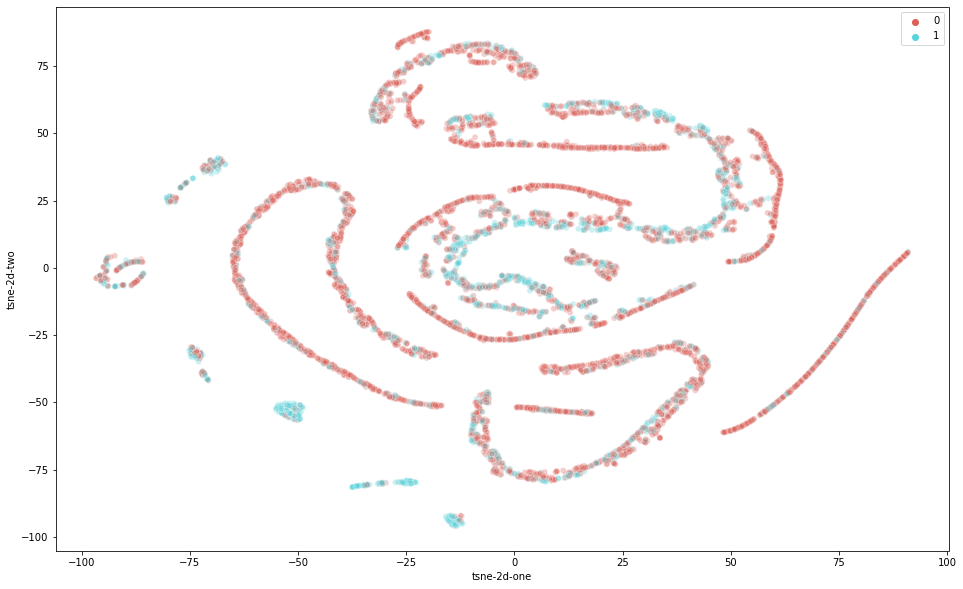

In [66]:
plot_tsne(temp, 'Churn')

# <a id='4'> 4. Feature Selection </a>

## <a id='4.1'> 4.1. KS & Churn Detection Rate Univariate Filter </a>

In [67]:
rate

0.2653698707936959

In [68]:
# CDR is calculate at the 0.3 threshold, slightly larger than the average churn rate of 0.265
def calculate_KSCDR(xx, yy, threshold = 0.3):
    """Calculate KS score and Churn Detection Rate for all features and store the result in a dataframe."""
    xy = pd.concat([xx, yy], axis = 1)
    churn = xy[xy['Churn']==0]
    not_churn = xy[xy['Churn']==1]
    topRows = round(len(xy) * threshold)
    numBads = yy['Churn'].sum()

    KS = pd.DataFrame(index = xy.columns, columns = ['KS', 'CDR'])
    for col in xy.columns:
        KS.loc[col, 'KS']= sps.ks_2samp(churn[col],not_churn[col])[0]

        temp1 = xy[set([col, 'Churn'])].sort_values(col,ascending=False).head(topRows)
        temp2 = xy[set([col, 'Churn'])].sort_values(col,ascending=True).head(topRows)
        CDR1 = temp1['Churn'].sum() / numBads
        CDR2 = temp2['Churn'].sum() / numBads
        CDRate=np.maximum(CDR1,CDR2)
        KS.loc[col,"CDR"] = CDRate

    KS['AVG'] = (KS['KS'] + KS['CDR'])/2
    KS = KS.sort_values('AVG', ascending = False)
    
    return KS

In [69]:
# perform train test split on the encoded data
X_tgt_train = X_tgt.loc[train_custID]
X_onehot_train = X_onehot.loc[train_custID]
X_tgt_test = X_tgt.loc[test_custID]
X_onehot_test = X_onehot.loc[test_custID]
y_train = y.loc[train_custID]
y_test = y.loc[test_custID]

In [70]:
KSCDR_tgt = calculate_KSCDR(X_tgt_train, y_train, threshold = 0.3)
KSCDR_tgt

KS        CDR        AVG
Churn                          1          1          1
tenure                  0.360059   0.541806   0.450932
PaymentMethod_tgt       0.318056   0.478261   0.398159
Non-Protection          0.279265   0.428094    0.35368
TotalCharges            0.223624    0.46087   0.342247
MonthlyCharges          0.249647   0.371906   0.310776
OnlineSecurity_tgt      0.390709   0.149833   0.270271
TechSupport_tgt         0.386713   0.143813   0.265263
DeviceProtection_tgt    0.286497   0.237458   0.261978
Contract_tgt            0.461026  0.0488294   0.254928
InternetService_tgt     0.342409   0.159866   0.251138
StreamingMovies_tgt     0.214076   0.258194   0.236135
StreamingTV_tgt         0.214076   0.254181   0.234128
OnlineBackup_tgt        0.293559   0.143144   0.218352
SeniorCitizen           0.129643   0.255518    0.19258
Dependents              0.181151   0.165886   0.173519
TotalServices           0.114592   0.194649    0.15462
PaperlessBilling         0.22633  0.0755853   0.150958
Partner                 0.180191   0.100334   0.140263
MultipleLines_tgt      0.0481916   0.155184   0.101688
PhoneService          0.00894243  0.0896321  0.0492873
Female                 0.0156004  0.0468227  0.0312116

In [71]:
# select features with average score above 0.2
filtered_cols_tgt = list(KSCDR_tgt[KSCDR_tgt['AVG'] > 0.1].index)
filtered_cols_tgt.remove('Churn')
print('# features selected by filter:', len(filtered_cols_tgt))
filtered_cols_tgt

# features selected by filter: 19


['tenure',
 'PaymentMethod_tgt',
 'Non-Protection',
 'TotalCharges',
 'MonthlyCharges',
 'OnlineSecurity_tgt',
 'TechSupport_tgt',
 'DeviceProtection_tgt',
 'Contract_tgt',
 'InternetService_tgt',
 'StreamingMovies_tgt',
 'StreamingTV_tgt',
 'OnlineBackup_tgt',
 'SeniorCitizen',
 'Dependents',
 'TotalServices',
 'PaperlessBilling',
 'Partner',
 'MultipleLines_tgt']

In [72]:
KSCDR_onehot = calculate_KSCDR(X_onehot_train, y_train, threshold = 0.3)
KSCDR_onehot

KS         CDR        AVG
Churn                                           1           1          1
tenure                                   0.360059    0.541806   0.450932
PaymentMethod_ElectronicCheck            0.318056    0.468896   0.393476
Non-Protection                           0.279265    0.428094    0.35368
TotalCharges                             0.223624     0.46087   0.342247
MonthlyCharges                           0.249647    0.371906   0.310776
OnlineSecurity_No                        0.390709     0.13311    0.26191
TechSupport_No                           0.386713    0.125084   0.255898
InternetService_FiberOptic               0.342409    0.159866   0.251138
DeviceProtection_No                      0.286497    0.209365   0.247931
Contract_Month-To-Month                  0.461026  0.00133779   0.231182
OnlineBackup_No                          0.293559    0.143144   0.218352
StreamingTV_No                           0.141588    0.293645   0.217617
StreamingMovies_No                       0.154075    0.234114   0.194095
SeniorCitizen                            0.129643    0.255518    0.19258
TechSupport_Yes                          0.172637    0.175251   0.173944
Dependents                               0.181151    0.165886   0.173519
OnlineSecurity_Yes                       0.176633    0.167224   0.171928
PaymentMethod_BankTransfer(Automatic)    0.105635    0.217391   0.161513
TotalServices                            0.114592    0.194649    0.15462
InternetService_Dsl                      0.128333    0.175251   0.151792
PaperlessBilling                          0.22633   0.0755853   0.150958
Partner                                  0.180191    0.100334   0.140263
OnlineBackup_Yes                        0.0794833    0.189298    0.13439
Contract_OneYear                         0.166319   0.0856187   0.125969
PaymentMethod_MailedCheck               0.0870913    0.163211   0.125151
DeviceProtection_Yes                    0.0724208    0.131773   0.102097
StreamingTV_Yes                         0.0724881    0.131104   0.101796
StreamingMovies_Yes                     0.0600006    0.118395  0.0891976
MultipleLines_NoPhoneService           0.00894243    0.090301  0.0496217
PhoneService                           0.00894243   0.0896321  0.0492873
Female                                  0.0156004   0.0468227  0.0312116
MultipleLines_No                        0.0392491   0.0214047  0.0303269

In [73]:
# select features with average score above 0.2
filtered_cols_onehot = list(KSCDR_onehot[KSCDR_onehot['AVG'] > 0.1].index)
filtered_cols_onehot.remove('Churn')
print('# features selected by filter:', len(filtered_cols_onehot))
filtered_cols_onehot

# features selected by filter: 27


['tenure',
 'PaymentMethod_ElectronicCheck',
 'Non-Protection',
 'TotalCharges',
 'MonthlyCharges',
 'OnlineSecurity_No',
 'TechSupport_No',
 'InternetService_FiberOptic',
 'DeviceProtection_No',
 'Contract_Month-To-Month',
 'OnlineBackup_No',
 'StreamingTV_No',
 'StreamingMovies_No',
 'SeniorCitizen',
 'TechSupport_Yes',
 'Dependents',
 'OnlineSecurity_Yes',
 'PaymentMethod_BankTransfer(Automatic)',
 'TotalServices',
 'InternetService_Dsl',
 'PaperlessBilling',
 'Partner',
 'OnlineBackup_Yes',
 'Contract_OneYear',
 'PaymentMethod_MailedCheck',
 'DeviceProtection_Yes',
 'StreamingTV_Yes']

## <a id='4.2'> 4.2. Cross-Validated Recursive Feature Elimination </a>

In [74]:
# Z-scale all features before RFE
scaler = StandardScaler()
X_trn_tgt_scaled = scaler.fit_transform(X_tgt_train)
X_tst_tgt_scaled = scaler.transform(X_tgt_test)
X_trn_tgt_scaled = pd.DataFrame(X_trn_tgt_scaled, index = X_tgt_train.index, columns = X_tgt_train.columns)
X_tst_tgt_scaled = pd.DataFrame(X_tst_tgt_scaled, index = X_tgt_test.index, columns = X_tgt_test.columns)

X_trn_oh_scaled = scaler.fit_transform(X_onehot_train)
X_tst_oh_scaled = scaler.transform(X_onehot_test)
X_trn_oh_scaled = pd.DataFrame(X_trn_oh_scaled, index = X_onehot_train.index, columns = X_onehot_train.columns)
X_tst_oh_scaled = pd.DataFrame(X_tst_oh_scaled, index = X_onehot_test.index, columns = X_onehot_test.columns)

In [75]:
rf = RandomForestClassifier(random_state = 13)
rfecv = RFECV(estimator=rf, cv=5, n_jobs=-1)
rfecv.fit(X_trn_tgt_scaled[filtered_cols_tgt], y_train)

RFECV(cv=5, estimator=RandomForestClassifier(random_state=13), n_jobs=-1)

In [76]:
var_tgt = pd.DataFrame(zip(rfecv.ranking_, filtered_cols_tgt),
                       columns = ['ranking', 'variable'])
var_tgt.loc[rfecv.support_, 'feature_importance'] = rfecv.estimator_.feature_importances_
var_tgt = var_tgt.sort_values(['ranking', 'feature_importance'], ascending = [1, 0])
var_tgt

ranking              variable  feature_importance
3         1          TotalCharges            0.185798
4         1        MonthlyCharges            0.174582
0         1                tenure            0.158948
8         1          Contract_tgt            0.077103
1         1     PaymentMethod_tgt            0.055234
5         1    OnlineSecurity_tgt            0.043229
6         1       TechSupport_tgt            0.034433
9         1   InternetService_tgt            0.033815
15        1         TotalServices            0.033610
16        1      PaperlessBilling            0.026410
18        1     MultipleLines_tgt            0.024507
17        1               Partner            0.023048
14        1            Dependents            0.020721
13        1         SeniorCitizen            0.020447
7         1  DeviceProtection_tgt            0.020296
12        1      OnlineBackup_tgt            0.019298
11        1       StreamingTV_tgt            0.016700
2         1        Non-Protection            0.016565
10        1   StreamingMovies_tgt            0.015254

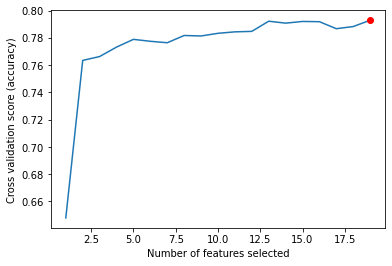

In [77]:
# As we can see from the result below, the optimal variables are top 13 variables.

plt.figure()
plt.xlabel("Number of features selected")
plt.ylabel("Cross validation score (accuracy)")
plt.plot(range(1, len(rfecv.grid_scores_)+1), rfecv.grid_scores_,
         markevery = [rfecv.n_features_-1], marker = 'o', 
         markeredgecolor = 'red', markerfacecolor = 'red')
plt.savefig('FS.pdf', format='pdf')
plt.show()

In [78]:
selected_tgt = var_tgt[var_tgt['ranking']==1]['variable'].tolist()
print('# features selected (target encoded):', len(selected_tgt))
selected_tgt

# features selected (target encoded): 19


['TotalCharges',
 'MonthlyCharges',
 'tenure',
 'Contract_tgt',
 'PaymentMethod_tgt',
 'OnlineSecurity_tgt',
 'TechSupport_tgt',
 'InternetService_tgt',
 'TotalServices',
 'PaperlessBilling',
 'MultipleLines_tgt',
 'Partner',
 'Dependents',
 'SeniorCitizen',
 'DeviceProtection_tgt',
 'OnlineBackup_tgt',
 'StreamingTV_tgt',
 'Non-Protection',
 'StreamingMovies_tgt']

In [79]:
rf = RandomForestClassifier(random_state = 13)
rfecv = RFECV(estimator=rf, cv=5, n_jobs=-1)
rfecv.fit(X_trn_oh_scaled[filtered_cols_onehot], y_train)

RFECV(cv=5, estimator=RandomForestClassifier(random_state=13), n_jobs=-1)

In [80]:
var_oh = pd.DataFrame(zip(rfecv.ranking_, filtered_cols_onehot),
                       columns = ['ranking', 'variable'])
var_oh.loc[rfecv.support_, 'feature_importance'] = rfecv.estimator_.feature_importances_
var_oh = var_oh.sort_values(['ranking', 'feature_importance'], ascending = [1, 0])
var_oh

ranking                               variable  feature_importance
3         1                           TotalCharges            0.202776
4         1                         MonthlyCharges            0.196871
0         1                                 tenure            0.167730
9         1                Contract_Month-To-Month            0.078246
5         1                      OnlineSecurity_No            0.052143
6         1                         TechSupport_No            0.041591
18        1                          TotalServices            0.040928
1         1          PaymentMethod_ElectronicCheck            0.034500
7         1             InternetService_FiberOptic            0.030268
20        1                       PaperlessBilling            0.027639
10        1                        OnlineBackup_No            0.024644
21        1                                Partner            0.024352
13        1                          SeniorCitizen            0.021096
15        1                             Dependents            0.020816
8         1                    DeviceProtection_No            0.018919
12        1                     StreamingMovies_No            0.017480
11        2                         StreamingTV_No                 NaN
17        3  PaymentMethod_BankTransfer(Automatic)                 NaN
2         4                         Non-Protection                 NaN
24        5              PaymentMethod_MailedCheck                 NaN
23        6                       Contract_OneYear                 NaN
19        7                    InternetService_Dsl                 NaN
16        8                     OnlineSecurity_Yes                 NaN
26        9                        StreamingTV_Yes                 NaN
22       10                       OnlineBackup_Yes                 NaN
25       11                   DeviceProtection_Yes                 NaN
14       12                        TechSupport_Yes                 NaN

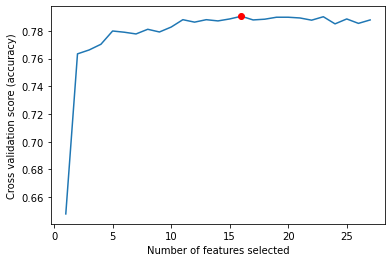

In [81]:
# As we can see from the result below, the optimal variables are top 20 variables.

plt.figure()
plt.xlabel("Number of features selected")
plt.ylabel("Cross validation score (accuracy)")
plt.plot(range(1, len(rfecv.grid_scores_)+1), rfecv.grid_scores_,
         markevery = [rfecv.n_features_-1], marker = 'o', 
         markeredgecolor = 'red', markerfacecolor = 'red')
plt.savefig('FS.pdf', format='pdf')
plt.show()

In [82]:
selected_oh = var_oh[var_oh['ranking']==1]['variable'].tolist()
print('# features selected (one-hot encoded):', len(selected_oh))
selected_oh

# features selected (one-hot encoded): 16


['TotalCharges',
 'MonthlyCharges',
 'tenure',
 'Contract_Month-To-Month',
 'OnlineSecurity_No',
 'TechSupport_No',
 'TotalServices',
 'PaymentMethod_ElectronicCheck',
 'InternetService_FiberOptic',
 'PaperlessBilling',
 'OnlineBackup_No',
 'Partner',
 'SeniorCitizen',
 'Dependents',
 'DeviceProtection_No',
 'StreamingMovies_No']

In [83]:
# Prepare the final features to be used for model building
# Two set of features are prepared: 
# one with target encoded categorical variables and one with one-hot encoded variables
X_trn_tgt = X_trn_tgt_scaled[selected_tgt]
X_tst_tgt = X_tst_tgt_scaled[selected_tgt]
X_trn_oh = X_trn_oh_scaled[selected_oh]
X_tst_oh = X_tst_oh_scaled[selected_oh]
print("final train/test X shape (target encoded):", X_trn_tgt.shape, X_tst_tgt.shape)
print("final train/test X shape (one-hot encoded):", X_trn_oh.shape, X_tst_oh.shape)
print("final train/test y shape:", y_train.shape, y_test.shape)

final train/test X shape (target encoded): (5634, 19) (1409, 19)
final train/test X shape (one-hot encoded): (5634, 16) (1409, 16)
final train/test y shape: (5634, 1) (1409, 1)


# <a id='5'> 5. Model Building (Baseline) </a>

#### Synthetic Minority Oversampling Technique (SMOTE)
* Randomly pick a point from the minority class.
* Compute the k-nearest neighbors (for some pre-specified k) for this point.
* Add k new points somewhere between the chosen point and each of its neighbors

In [84]:
def calculate_scores(model, X_trn, y_trn, X_tst, y_tst):
    """Calculate accuracy, roc-auc, and KS scores on the test set"""
    model.fit(X_trn, y_trn)
    y_pred = model.predict(X_tst)
    accuracy = accuracy_score(y_tst, y_pred)

    y_pred_proba = model.predict_proba(X_tst)[:,1]
    auc = roc_auc_score(y_tst, y_pred_proba)

    mask = y_tst['Churn'].astype(bool).values
    churn = y_pred_proba[mask]
    not_churn = y_pred_proba[~mask]
    ks = sps.ks_2samp(churn, not_churn)[0]
    
    return accuracy, auc, ks

def fit_first_level(models, X_trn, y_trn, X_tst):
    """
    Prepare first-level model fitting for stacking. Only used during model stacking.
    Output the predicted probabilities of the first-level models as features for the stacking model.
    """
    # create dataframes to store predictions of the first level models
    X2_trn = np.zeros((len(X_trn), 2 * len(models)))
    X2_tst = np.zeros((len(X_tst), 2 * len(models)))

    for i, (model, smote) in enumerate(models.values()):
        # if the selected model requires upsampling
        if smote:
            smote = SMOTE()
            X_trn_rs, y_trn_rs = smote.fit_sample(X_trn, y_trn)
        else:
            X_trn_rs, y_trn_rs = X_trn, y_trn

        model.fit(X_trn_rs, y_trn_rs)
        y_trn_pred_proba = model.predict_proba(X_trn)
        y_tst_pred_proba = model.predict_proba(X_tst)

        X2_trn[:, i*2:(i+1)*2] = y_trn_pred_proba
        X2_tst[:, i*2:(i+1)*2] = y_tst_pred_proba
    
    return X2_trn, X2_tst

def calculate_cv_scores(model, X, y, cv = 5, smote = True, stacking = False, models = None, verbose = False):
    """Calculate average k-fold cross-validated accuracy, roc-auc, and KS scores"""
    kf = KFold(n_splits = cv, shuffle = True)
    accuracy_scores = []
    auc_scores = []
    ks_scores = []
    fold_count = 0

    for train_index, test_index in kf.split(X):
        X_trn, X_tst = X.iloc[train_index], X.iloc[test_index]
        y_trn, y_tst = y.iloc[train_index], y.iloc[test_index]
        
        # Do not upsample when stacking models
        # Note that the first-level models used may incorperate SMOTE
        # Which is handled in the fit_first_level function
        if stacking:
            smote = False
            X_trn, X_tst = fit_first_level(models, X_trn, y_trn, X_tst)
            
        if smote:
            smote = SMOTE()
            X_trn, y_trn = smote.fit_sample(X_trn, y_trn)

        accuracy, auc, ks = calculate_scores(model, X_trn, y_trn, X_tst, y_tst)
        accuracy_scores.append(accuracy)
        auc_scores.append(auc)
        ks_scores.append(ks)
        
        if verbose:
            print(f"Fold {fold_count} accuracy, auc, ks:", accuracy, auc, ks)
        fold_count += 1

    return np.mean(accuracy_scores), np.mean(auc_scores), np.mean(ks_scores)

def fit_models_summary(models, X, y, cv = 5, smote = True):
    """
    Calculate average k-fold cross-validated accuracy, roc-auc, and KS scores for multiple models.
    Generate a summary dataframe sorted by roc-auc desending.
    If smote is True, each model will be additionally trained on upsampled train sets during cross validation.
    """
    baseline = pd.DataFrame(columns = ['accuracy', 'auc', 'ks'])
    
    for name, model in models.items():
        
        accuracy, auc, ks = calculate_cv_scores(model, X, y, cv = cv, smote = False)
        baseline.loc[name] = [accuracy, auc, ks]
        
        if smote:
            accuracy, auc, ks = calculate_cv_scores(model, X, y, cv = cv, smote = True)
            baseline.loc["{} (SMOTE)".format(name)] = [accuracy, auc, ks]
            
        print(f"{name} processed")
    
    baseline = baseline.sort_values('auc', ascending = False)
    
    return baseline

In [85]:
models = {
    'Logistic Regression': LogisticRegression(),
    'Decision Tree': DecisionTreeClassifier(),
    'K Nearest Neighbors': KNeighborsClassifier(),
    'Random Forest': RandomForestClassifier(),
    'Gaussian Naive Bayes': GaussianNB(),
    'Light GBM': LGBMClassifier(),
    'XGBoost': XGBClassifier(),
    'Gradient Boosting': GradientBoostingClassifier(),
    "Neural Network": MLPClassifier(hidden_layer_sizes = (10,)),
#     'Support Vector Machine': SVC()
}

## <a id='5.1'> 5.1. Target Encoded Features </a>

In [86]:
# test baseline models (default hyperparameters) on target encoded features
baseline_tgt = fit_models_summary(models, X_trn_tgt, y_train)

Logistic Regression processed
Decision Tree processed
K Nearest Neighbors processed
Random Forest processed
Gaussian Naive Bayes processed
Light GBM processed
XGBoost processed
Gradient Boosting processed
Neural Network processed


In [87]:
baseline_tgt

accuracy       auc        ks
Gradient Boosting (SMOTE)     0.788959  0.847364  0.554420
Logistic Regression           0.805290  0.847007  0.548651
Logistic Regression (SMOTE)   0.758963  0.846394  0.555181
Gradient Boosting             0.802977  0.845615  0.549251
Neural Network                0.799611  0.841024  0.538323
Light GBM                     0.791444  0.833539  0.520497
Light GBM (SMOTE)             0.784348  0.832315  0.522190
Neural Network (SMOTE)        0.758076  0.832292  0.531635
Random Forest                 0.789491  0.827287  0.511918
Random Forest (SMOTE)         0.780791  0.824490  0.514134
XGBoost                       0.783635  0.821306  0.496078
XGBoost (SMOTE)               0.779553  0.819688  0.489634
Gaussian Naive Bayes (SMOTE)  0.713882  0.815831  0.517790
Gaussian Naive Bayes          0.724882  0.815395  0.520527
K Nearest Neighbors           0.773345  0.783261  0.452213
K Nearest Neighbors (SMOTE)   0.712640  0.773583  0.431245
Decision Tree (SMOTE)         0.728614  0.671609  0.343543
Decision Tree                 0.733583  0.664262  0.328922

## <a id='5.2'> 5.2. One-hot Encoded Features </a>

In [88]:
# test baseline models (default hyperparameters) on one-hot encoded features
baseline_oh = fit_models_summary(models, X_trn_oh, y_train)

Logistic Regression processed
Decision Tree processed
K Nearest Neighbors processed
Random Forest processed
Gaussian Naive Bayes processed
Light GBM processed
XGBoost processed
Gradient Boosting processed
Neural Network processed


In [89]:
baseline_oh

accuracy       auc        ks
Logistic Regression (SMOTE)   0.753290  0.844892  0.551155
Logistic Regression           0.801915  0.844111  0.547694
Gradient Boosting (SMOTE)     0.780264  0.842620  0.546540
Gradient Boosting             0.804757  0.841800  0.542690
Neural Network                0.795882  0.835126  0.525225
Light GBM (SMOTE)             0.790736  0.832804  0.517800
Neural Network (SMOTE)        0.750090  0.831429  0.523942
Light GBM                     0.795527  0.831315  0.520709
Gaussian Naive Bayes          0.756657  0.827064  0.523250
Gaussian Naive Bayes (SMOTE)  0.742988  0.827009  0.522232
XGBoost (SMOTE)               0.781328  0.824229  0.508836
Random Forest (SMOTE)         0.783102  0.824165  0.508226
Random Forest                 0.794997  0.821142  0.505890
XGBoost                       0.786829  0.819229  0.502171
K Nearest Neighbors           0.768724  0.777086  0.452504
K Nearest Neighbors (SMOTE)   0.716540  0.765965  0.435063
Decision Tree (SMOTE)         0.726130  0.679223  0.358754
Decision Tree                 0.721867  0.655315  0.311312

## <a id='5.3'> 5.3. Model Performances Comparison </a>

In [90]:
def output_tracer(summary, model_name, color) :
    """Create tracers for each model."""
    tracer = go.Bar(y = summary.columns ,
                    x = summary.loc[model_name],
                    orientation = "h",name = model_name ,
                    marker = dict(line = dict(width =.7),
                                  color = color)
                   )
    return tracer

def plot_performance(summary):
    """Plot model performance metrics for each model, grouped by metric type."""
    layout = go.Layout(dict(title = "Model Performances",
                            plot_bgcolor  = "rgb(243,243,243)",
                            paper_bgcolor = "rgb(243,243,243)",
                            xaxis = dict(gridcolor = 'rgb(255, 255, 255)',
                                         title = "model",
                                         zerolinewidth=1,
                                         ticklen=5,gridwidth=2),
                            yaxis = dict(gridcolor = 'rgb(255, 255, 255)',
                                         zerolinewidth=1,ticklen=5,gridwidth=2),
                            margin = dict(l = 250),
                            height = 780
                           )
                      )

    palette = px.colors.sequential.dense[2:] + px.colors.sequential.matter[2:] + px.colors.sequential.matter[2:]
    data = []
    for i, model_name in enumerate(summary.index):
        color = palette[i]
        data.append(output_tracer(summary, model_name, color))

    fig = go.Figure(data=data,layout=layout)
    py.iplot(fig)

In [91]:
baseline_tgt['ks']

Gradient Boosting (SMOTE)       0.554420
Logistic Regression             0.548651
Logistic Regression (SMOTE)     0.555181
Gradient Boosting               0.549251
Neural Network                  0.538323
Light GBM                       0.520497
Light GBM (SMOTE)               0.522190
Neural Network (SMOTE)          0.531635
Random Forest                   0.511918
Random Forest (SMOTE)           0.514134
XGBoost                         0.496078
XGBoost (SMOTE)                 0.489634
Gaussian Naive Bayes (SMOTE)    0.517790
Gaussian Naive Bayes            0.520527
K Nearest Neighbors             0.452213
K Nearest Neighbors (SMOTE)     0.431245
Decision Tree (SMOTE)           0.343543
Decision Tree                   0.328922
Name: ks, dtype: float64

In [92]:
comparison = pd.DataFrame()
# comparison['Target_Encoding'] = ks_tst.T.Mean
# comparison['Get_Dummies'] = ks_tst_dummies.T.Mean
comparison['Target_Encoding'] = baseline_tgt['ks']
comparison['Get_Dummies'] = baseline_oh['ks']
comparison

Target_Encoding  Get_Dummies
Gradient Boosting (SMOTE)            0.554420     0.546540
Logistic Regression                  0.548651     0.547694
Logistic Regression (SMOTE)          0.555181     0.551155
Gradient Boosting                    0.549251     0.542690
Neural Network                       0.538323     0.525225
Light GBM                            0.520497     0.520709
Light GBM (SMOTE)                    0.522190     0.517800
Neural Network (SMOTE)               0.531635     0.523942
Random Forest                        0.511918     0.505890
Random Forest (SMOTE)                0.514134     0.508226
XGBoost                              0.496078     0.502171
XGBoost (SMOTE)                      0.489634     0.508836
Gaussian Naive Bayes (SMOTE)         0.517790     0.522232
Gaussian Naive Bayes                 0.520527     0.523250
K Nearest Neighbors                  0.452213     0.452504
K Nearest Neighbors (SMOTE)          0.431245     0.435063
Decision Tree (SMOTE)                0.343543     0.358754
Decision Tree                        0.328922     0.311312

In [93]:
models = comparison.index.to_list()
models = ['GBS','GB','LRS','LR','NN','NNS','LGBS','LGB','NBS','NB','RF','XGB','RFS','XGBS','KN','KNS','DTS','DT']
models

['GBS',
 'GB',
 'LRS',
 'LR',
 'NN',
 'NNS',
 'LGBS',
 'LGB',
 'NBS',
 'NB',
 'RF',
 'XGB',
 'RFS',
 'XGBS',
 'KN',
 'KNS',
 'DTS',
 'DT']

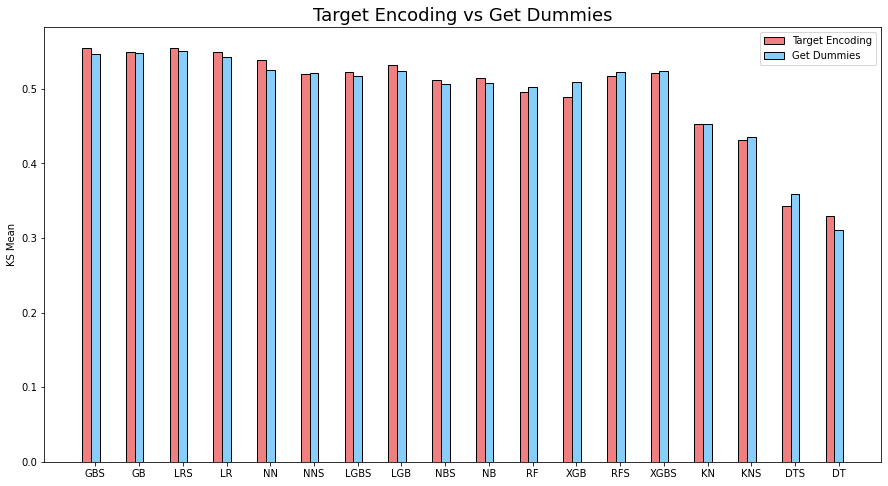

In [94]:
# plot a bar plot 
plt.figure(figsize=(15,8))

# width of the bars
barWidth = 0.2
 
# The x position of bars
r1 = np.arange(len(comparison['Target_Encoding']))
r2 = [x + barWidth for x in r1]
# r3 = [x + barWidth for x in r2]
 
# Create blue bars
plt.bar(r1, comparison['Target_Encoding'], width = barWidth, color = 'lightcoral', edgecolor = 'black', capsize=7, label='Target Encoding')
 
plt.bar(r2, comparison['Get_Dummies'], width = barWidth, color = 'lightskyblue', edgecolor = 'black', capsize=7, label='Get Dummies')
    
# general layout
plt.xticks([r + barWidth for r in range(len(comparison['Target_Encoding']))], models)
plt.ylabel('KS Mean')
plt.legend()
plt.title('Target Encoding vs Get Dummies', fontsize=18)
 
# Show graphic
plt.show()

In [95]:
# Baseline model performance on target encoded features
plot_performance(baseline_tgt)

In [96]:
# Baseline model performance on one-hot encoded features
plot_performance(baseline_oh)

#### Insights:
- one-hot encoded dataset and target encoded dataset perform very similar on the baseline models (default hyperparameters)
- upsampling the minority class doesn't always improve model performance
- GBT, LR and NN are the top 3 models for both datasets

#### The following model tuning process will focus only on the top 3 models and the target encoded dataset.

# <a id='6'> 6. Model Tuning </a>

In [97]:
def get_paramsList(params_grid):
    """
    Create all possible combinations of params.
    Returns a list of all param names and a list of all param combinations.
    """
    allNames = sorted(params_grid)
    combinations = it.product(*(params_grid[Name] for Name in allNames))
    all_params = list(combinations)
    return allNames, all_params

In [98]:
def param_search(model, X, y, param_grid, verbose = True, scoring = 'ks', 
                 smote = True, stacking = False, models = None):
    """
    Brute force search through param_grid to find the optimal parameter combination based on the specified score type. 
    Can be used to search parameters for both stacking model and regular models.
    When stacking is True, SMOTE is disabled.
    scoring = ['accuracy', 'auc', 'ks']
    """
    param_names, all_params = get_paramsList(param_grid)
    print("Total combination:", len(all_params))
    best_score = 0
    best_param = None
    best_smote = None
    best_scores = None
    
    count = 0
    
    if stacking:
        smote = False
    
    if smote:
        smote_range = [True, False]
    else:
        smote_range = [False]

    for smote in smote_range:
        print(f"smote = {smote}")
        for cur_params in all_params:
            params = dict(zip(param_names, cur_params))
            model.set_params(**params)
            accuracy, auc, ks = calculate_cv_scores(model, X, y, smote = smote,
                                                    stacking = stacking, models = models)
            
            if verbose:
                print("\t", params, f"accuracy: {accuracy:.3f}, auc: {auc:.3f}, ks: {ks:.3f}")
            
            # choose which score to use
            if scoring == 'accuracy':
                score = accuracy
            elif scoring == "auc":
                score = auc
            else:
                score = ks
                
            if score > best_score:
                best_score = score
                best_param = params
                best_smote = smote
                best_scores = [accuracy, auc, ks]
            
            count += 1
            if count%10 == 0:
                print(f"{count} combinations searched")
    
    print("Best param:", best_param, f"smote = {best_smote}")
    print("Best scores (accuracy, auc, ks):", best_scores)
    return best_param, best_scores, best_smote

In [99]:
def smote_name(name, smote):
    """Adjust model name to include (SMOTE)"""
    if smote:
        return name + " (SMOTE)"
    return name

In [100]:
tuned_models = {}
tuned_summary = pd.DataFrame(columns = ['accuracy', 'auc', 'ks'])

## <a id='6.1'> 6.1. Logistic Regression </a>

In [101]:
param_grid = {
    'C': [0.001,0.01,0.1,1,10,100, 1000]
}

model = LogisticRegression()
params, scores, smote = param_search(model, X_trn_tgt, y_train, param_grid, verbose = True)

Total combination: 7
smote = True
	 {'C': 0.001} accuracy: 0.744, auc: 0.838, ks: 0.542
	 {'C': 0.01} accuracy: 0.754, auc: 0.844, ks: 0.547
	 {'C': 0.1} accuracy: 0.754, auc: 0.845, ks: 0.548
	 {'C': 1} accuracy: 0.755, auc: 0.845, ks: 0.545
	 {'C': 10} accuracy: 0.755, auc: 0.847, ks: 0.545
	 {'C': 100} accuracy: 0.755, auc: 0.846, ks: 0.546
	 {'C': 1000} accuracy: 0.755, auc: 0.846, ks: 0.546
smote = False
	 {'C': 0.001} accuracy: 0.788, auc: 0.834, ks: 0.537
	 {'C': 0.01} accuracy: 0.801, auc: 0.841, ks: 0.542
	 {'C': 0.1} accuracy: 0.806, auc: 0.845, ks: 0.548
10 combinations searched
	 {'C': 1} accuracy: 0.804, auc: 0.845, ks: 0.552
	 {'C': 10} accuracy: 0.806, auc: 0.847, ks: 0.550
	 {'C': 100} accuracy: 0.805, auc: 0.847, ks: 0.552
	 {'C': 1000} accuracy: 0.805, auc: 0.847, ks: 0.554
Best param: {'C': 1000} smote = False
Best scores (accuracy, auc, ks): [0.8051103150349646, 0.8469543784545351, 0.5541155650576733]


In [102]:
# sample output from param_search
# smote = False
# params = {'C': 10}
# scores = [0.8004947194724673, 0.8436302575069327, 0.5477642725563683]

In [103]:
name = 'Logistic Regression'
model.set_params(**params)
tuned_models[name] = (model, smote)
tuned_summary.loc[smote_name(name, smote)] = scores
tuned_summary

accuracy       auc        ks
Logistic Regression   0.80511  0.846954  0.554116

## <a id='6.2'> 6.2. Gradient Boosting Tree </a>

In [104]:
param_grid = {
    'max_depth': [3],
    'n_estimators': [1000, 1200],
    'learning_rate': [0.005, 0.01]
}

model = GradientBoostingClassifier()
params, scores, smote = param_search(model, X_trn_tgt, y_train, param_grid, verbose = True)

Total combination: 4
smote = True
	 {'learning_rate': 0.005, 'max_depth': 3, 'n_estimators': 1000} accuracy: 0.779, auc: 0.846, ks: 0.548
	 {'learning_rate': 0.005, 'max_depth': 3, 'n_estimators': 1200} accuracy: 0.779, auc: 0.845, ks: 0.546
	 {'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 1000} accuracy: 0.786, auc: 0.846, ks: 0.552
	 {'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 1200} accuracy: 0.792, auc: 0.847, ks: 0.549
smote = False
	 {'learning_rate': 0.005, 'max_depth': 3, 'n_estimators': 1000} accuracy: 0.804, auc: 0.847, ks: 0.556
	 {'learning_rate': 0.005, 'max_depth': 3, 'n_estimators': 1200} accuracy: 0.804, auc: 0.847, ks: 0.554
	 {'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 1000} accuracy: 0.801, auc: 0.846, ks: 0.548
	 {'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 1200} accuracy: 0.802, auc: 0.845, ks: 0.548
Best param: {'learning_rate': 0.005, 'max_depth': 3, 'n_estimators': 1000} smote = False
Best scores (accuracy, auc, ks): [0

In [105]:
# sample output from param_search
# smote = False
# params = {'learning_rate': 0.005, 'max_depth': 3, 'n_estimators': 1200}
# scores = [0.804048693382674, 0.8489973734575298, 0.5564488545811939]

In [106]:
name = 'Gradient Boosting'
model.set_params(**params)
tuned_models[name] = (model, smote)
tuned_summary.loc[smote_name(name, smote)] = scores
tuned_summary

accuracy       auc        ks
Logistic Regression  0.805110  0.846954  0.554116
Gradient Boosting    0.803872  0.846995  0.556251

## <a id='6.3'> 6.3. Neural Network </a>

In [107]:
param_grid = {
    'hidden_layer_sizes': [(5,), (10,), (20,), (10,5), (8,3)],
    'activation': ['relu', 'logistic']
}

model = MLPClassifier()
params, scores, smote = param_search(model, X_trn_tgt, y_train, param_grid, verbose = True)

Total combination: 10
smote = True
	 {'activation': 'relu', 'hidden_layer_sizes': (5,)} accuracy: 0.753, auc: 0.838, ks: 0.531
	 {'activation': 'relu', 'hidden_layer_sizes': (10,)} accuracy: 0.751, auc: 0.835, ks: 0.521
	 {'activation': 'relu', 'hidden_layer_sizes': (20,)} accuracy: 0.759, auc: 0.828, ks: 0.526
	 {'activation': 'relu', 'hidden_layer_sizes': (10, 5)} accuracy: 0.752, auc: 0.821, ks: 0.506
	 {'activation': 'relu', 'hidden_layer_sizes': (8, 3)} accuracy: 0.758, auc: 0.832, ks: 0.525
	 {'activation': 'logistic', 'hidden_layer_sizes': (5,)} accuracy: 0.762, auc: 0.842, ks: 0.543
	 {'activation': 'logistic', 'hidden_layer_sizes': (10,)} accuracy: 0.757, auc: 0.842, ks: 0.545
	 {'activation': 'logistic', 'hidden_layer_sizes': (20,)} accuracy: 0.759, auc: 0.842, ks: 0.544
	 {'activation': 'logistic', 'hidden_layer_sizes': (10, 5)} accuracy: 0.759, auc: 0.839, ks: 0.535
	 {'activation': 'logistic', 'hidden_layer_sizes': (8, 3)} accuracy: 0.755, auc: 0.839, ks: 0.540
10 combinat

In [108]:
# sample output from param_search
# smote = True
# params = {'activation': 'logistic', 'hidden_layer_sizes': (20,)}
# scores = [0.7555906137263773, 0.8433426790599643, 0.5453838538711262]

In [109]:
name = 'Neural Network'
model.set_params(**params)
tuned_models[name] = (model, smote)
tuned_summary.loc[smote_name(name, smote)] = scores
tuned_summary

accuracy       auc        ks
Logistic Regression  0.805110  0.846954  0.554116
Gradient Boosting    0.803872  0.846995  0.556251
Neural Network       0.799785  0.841895  0.546619

## Deeper analysis of the random forest classifier

In [110]:
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report
from sklearn.metrics import roc_auc_score,roc_curve,scorer
from yellowbrick.classifier import DiscriminationThreshold


def telecom_churn_prediction_alg(algorithm,training_x,testing_x,
                                 training_y,testing_y,threshold_plot = True) :
    
    #model
    algorithm.fit(training_x,training_y)
    predictions   = algorithm.predict(testing_x)
    probabilities = algorithm.predict_proba(testing_x)
    
    print (algorithm)
    print ("\n Classification report : \n",classification_report(testing_y,predictions))
    print ("Accuracy Score   : ",accuracy_score(testing_y,predictions))
    #confusion matrix
    conf_matrix = confusion_matrix(testing_y,predictions)
    #roc_auc_score
    model_roc_auc = roc_auc_score(testing_y,predictions) 
    print ("Area under curve : ",model_roc_auc)
    fpr,tpr,thresholds = roc_curve(testing_y,probabilities[:,1])
     
    #plot roc curve
    trace1 = go.Scatter(x = fpr,y = tpr,
                        name = "Roc : " + str(model_roc_auc),
                        line = dict(color = ('rgb(22, 96, 167)'),width = 2),
                       )
    trace2 = go.Scatter(x = [0,1],y=[0,1],
                        line = dict(color = ('rgb(205, 12, 24)'),width = 2,
                        dash = 'dot'))
    
    #plot confusion matrix
    trace3 = go.Heatmap(z = conf_matrix ,x = ["Not churn","Churn"],
                        y = ["Not churn","Churn"],
                        showscale  = False,colorscale = "Blues",name = "matrix",
                        xaxis = "x2",yaxis = "y2"
                       )
    
    layout = go.Layout(dict(title="Model performance" ,
                            autosize = False,height = 500,width = 800,
                            showlegend = False,
                            plot_bgcolor  = "rgb(243,243,243)",
                            paper_bgcolor = "rgb(243,243,243)",
                            xaxis = dict(title = "false positive rate",
                                         gridcolor = 'rgb(255, 255, 255)',
                                         domain=[0, 0.6],
                                         ticklen=5,gridwidth=2),
                            yaxis = dict(title = "true positive rate",
                                         gridcolor = 'rgb(255, 255, 255)',
                                         zerolinewidth=1,
                                         ticklen=5,gridwidth=2),
                            margin = dict(b=200),
                            xaxis2=dict(domain=[0.7, 1],tickangle = 90,
                                        gridcolor = 'rgb(255, 255, 255)'),
                            yaxis2=dict(anchor='x2',gridcolor = 'rgb(255, 255, 255)')
                           )
                  )
    data = [trace1,trace2,trace3]
    fig = go.Figure(data=data,layout=layout)
    
    py.iplot(fig)
    
    if threshold_plot == True : 
        visualizer = DiscriminationThreshold(algorithm)
        visualizer.fit(training_x,training_y)
        visualizer.poof()

RandomForestClassifier(criterion='entropy', max_depth=30, max_features='sqrt',
                       n_estimators=300)

 Classification report : 
               precision    recall  f1-score   support

           0       0.83      0.88      0.85      1035
           1       0.60      0.50      0.54       374

    accuracy                           0.78      1409
   macro avg       0.71      0.69      0.70      1409
weighted avg       0.77      0.78      0.77      1409

Accuracy Score   :  0.7778566359119943
Area under curve :  0.6882766281743264


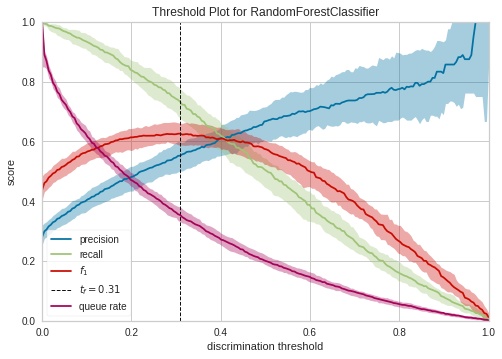

In [111]:
from sklearn.ensemble import RandomForestClassifier
cols = list(X_trn_tgt.columns)
rfc = RandomForestClassifier(n_estimators=300,
                             max_depth=30,
                             max_features='sqrt',
                             criterion='entropy')
telecom_churn_prediction_alg(rfc,X_trn_tgt,X_tst_tgt,
                             y_train,y_test,threshold_plot = True)

Text(0, 0.5, 'Accuracy')

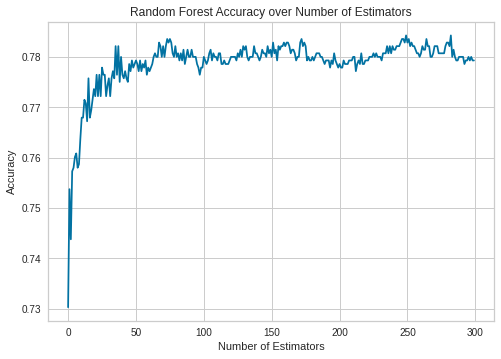

In [112]:
# to visualize the trees's accuracy on the test set
# we can see that the best n_estimators is probably around 30 - 50
from sklearn.metrics import accuracy_score
preds = np.stack([t.predict(X_tst_tgt).astype(int) for t in rfc.estimators_])
plt.plot([accuracy_score(preds[:i+1, :].mean(0) > 0.5, y_test.values) for i in range(300)])
plt.title('Random Forest Accuracy over Number of Estimators')
plt.xlabel('Number of Estimators')
plt.ylabel('Accuracy')

In [113]:
def rf_feature_importance(rfc, df, plot=True):
    feature_importance_df = pd.DataFrame({'features': df.columns,
                                          'importance': rfc.feature_importances_}).sort_values(
                                          'importance', ascending=False)
    if plot:
        feature_importance_df.plot('features', 'importance', 'barh', figsize=(12, 7), legend=False)
    return feature_importance_df

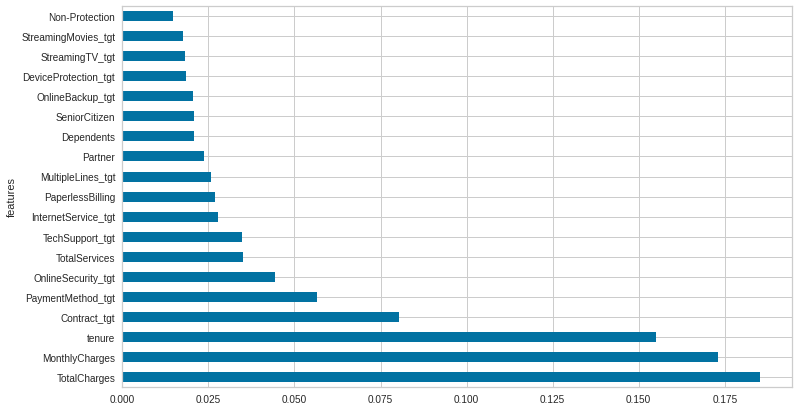

In [114]:
# compared to our recursive selection method
# simialar top features were found using feature importance with random forest
feautre_importance = rf_feature_importance(rfc, X_trn_tgt)

In [115]:
import scipy
from scipy.cluster import hierarchy as hc
def cluster_columns(df,figsize=(10,6),font_size=12):
    corr=np.round(scipy.stats.spearmanr(df).correlation,4)
    corr_condensed=hc.distance.squareform(1-corr)
    z=hc.linkage(corr_condensed,
    method='average')
    fig=plt.figure(figsize=figsize)
    hc.dendrogram(z,labels=df.columns,orientation='left',leaf_font_size=font_size)
    plt.show() 


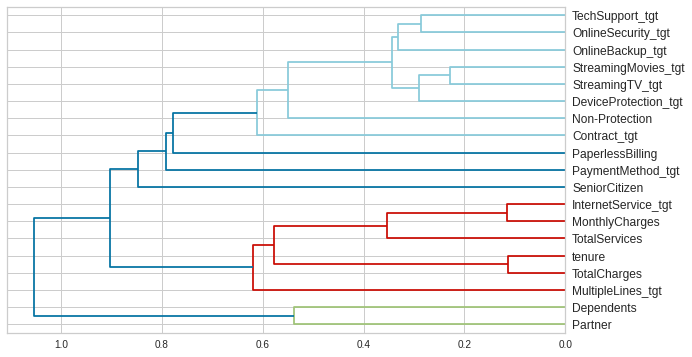

In [116]:
# we can see that some columns may be redundant because they cluster together very early on.
# we can try removing one of the pairs, for example, Contract--** are very similar
cluster_columns(X_trn_tgt)

In [117]:
# lets try dropping some of the 'redundant' features and see if it hurts performance
def get_oob(X, y):
    rf = RandomForestClassifier(n_estimators=100,
                                min_samples_leaf=10,
                                max_samples=300,
                                max_features=0.5,
                                oob_score=True)
    rf.fit(X, y)
    return rf.oob_score_

In [118]:
oob_score = get_oob(X_trn_tgt, y_train)

In [119]:
def OOB_increase(X_train, y_train, threshold=0.005):
    redundant_features = list(X_train.columns)
    dropped_feature_scores = {f: get_oob(X_train.drop(f, axis=1), y_train) for f in redundant_features}
    for feature, score in dropped_feature_scores.items():
        if score - oob_score > threshold:
            print(f'If we drop {feature}, OOB_Score increases {score - oob_score}')

In [120]:
# we can see these columns could possibly be dropped
OOB_increase(X_trn_tgt, y_train, threshold=0.0001)

If we drop MonthlyCharges, OOB_Score increases 0.0021299254526091493
If we drop tenure, OOB_Score increases 0.0008874689385871548
If we drop InternetService_tgt, OOB_Score increases 0.0037273695420659836
If we drop TotalServices, OOB_Score increases 0.0028399006034788288
If we drop Partner, OOB_Score increases 0.0012424565140219945
If we drop Dependents, OOB_Score increases 0.00141995030173947
If we drop StreamingTV_tgt, OOB_Score increases 0.003017394391196304


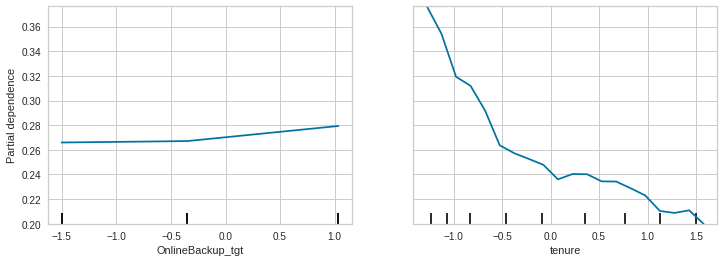

In [121]:
# let us study some dependencies on variables

from sklearn.inspection import plot_partial_dependence
fig, ax = plt.subplots(figsize=(12, 4))
rfc = RandomForestClassifier(n_estimators=50,
                             max_depth=30,
                             max_features='sqrt',
                             criterion='entropy')
rfc.fit(X_trn_tgt, y_train)
plot_partial_dependence(rfc, X_tst_tgt, ['OnlineBackup_tgt', 'tenure'], grid_resolution=20, ax=ax)

In [122]:
# from treeinterpreter import treeinterpreter
# from waterfall_chart import plot as waterfall

# row = X_tst_tgt.iloc[: 5]
# prediction, bias, contribution = treeinterpreter.predict(rfc, row.values)

In [123]:
# prediction[0], bias[0], contribution[0].sum()

In [124]:
# we can see from the first record, how much each of the variables impact the final prediction
# waterfall(X_test.columns, contribution[0][:, 1], rotation_value=45, formatting='{:,.3f}')

## <a id='6.4'> 6.4. Model Performances Comparison </a>

In [125]:
# plot model performance of the fine-tuned models
plot_performance(tuned_summary)

# <a id='7'> 7. Model Stacking </a>

## <a id='7.1'> 7.1. Baseline Stacking Model </a>

In [126]:
stack_model = XGBClassifier(max_depth = 3)
accuracy, auc, ks = calculate_cv_scores(stack_model, X_trn_tgt, y_train, 
                                        stacking = True, models = tuned_models, 
                                        verbose = True)
print('Stacking baseline:')
print('Accuracy:', accuracy)
print('AUC:', auc)
print('KS:', ks)

Fold 0 accuracy, auc, ks: 0.7905944986690329 0.8199745802932918 0.48203727687369785
Fold 1 accuracy, auc, ks: 0.7737355811889973 0.8364974345125573 0.5304347826086957
Fold 2 accuracy, auc, ks: 0.7994676131322094 0.8402704348104713 0.5312289724118043
Fold 3 accuracy, auc, ks: 0.7799467613132209 0.8100581380944909 0.49942192235591415
Fold 4 accuracy, auc, ks: 0.8081705150976909 0.838162782843634 0.514724755150287
Stacking baseline:
Accuracy: 0.7903829938802303
AUC: 0.8289926741108891
KS: 0.5115695418800799


## <a id='7.2'> 7.2. Stacking Model Tuning </a>

In [127]:
param_grid = {
    'eta': [0.01, 0.05, 0.1, 0.2],
    'max_depth': [3],
    'subsample': [0.9]
}

model = XGBClassifier()
params, scores, _ = param_search(model, X_trn_tgt, y_train, param_grid, verbose = True, scoring = 'ks', 
                                 smote = False, stacking = True, models = tuned_models)

Total combination: 4
smote = False
	 {'eta': 0.01, 'max_depth': 3, 'subsample': 0.9} accuracy: 0.802, auc: 0.846, ks: 0.551
	 {'eta': 0.05, 'max_depth': 3, 'subsample': 0.9} accuracy: 0.800, auc: 0.844, ks: 0.542
	 {'eta': 0.1, 'max_depth': 3, 'subsample': 0.9} accuracy: 0.801, auc: 0.848, ks: 0.557
	 {'eta': 0.2, 'max_depth': 3, 'subsample': 0.9} accuracy: 0.800, auc: 0.845, ks: 0.545
Best param: {'eta': 0.1, 'max_depth': 3, 'subsample': 0.9} smote = False
Best scores (accuracy, auc, ks): [0.8008512200926396, 0.8480977472578779, 0.5574221633904142]


In [128]:
# sample output from param_search
# params = {'eta': 0.05, 'max_depth': 3, 'subsample': 0.9}
# scores = [0.8006729697825534, 0.8415256143462543, 0.5400187260960047]

In [129]:
name = 'Stacking Model (XGB)'
stack_model = XGBClassifier(**params)
tuned_summary.loc[name] = scores
tuned_summary

accuracy       auc        ks
Logistic Regression   0.805110  0.846954  0.554116
Gradient Boosting     0.803872  0.846995  0.556251
Neural Network        0.799785  0.841895  0.546619
Stacking Model (XGB)  0.800851  0.848098  0.557422

In [130]:
# plot model performance of the fine-tuned models alongside the stacking model
plot_performance(tuned_summary)

# <a id='8'> 8. Model Evaluation on Hold-Out Set </a>

In [131]:
holdout_summary = pd.DataFrame(columns = ['accuracy', 'auc', 'ks'])

In [132]:
for name, (model, smote) in tuned_models.items():
    if smote:
        smote = SMOTE()
        X_trn, y_trn = smote.fit_sample(X_trn_tgt, y_train)
    else:
        X_trn, y_trn = X_trn_tgt, y_train
            
    accuracy, auc, ks = calculate_scores(model, X_trn, y_trn, X_tst_tgt, y_test)
    holdout_summary.loc[smote_name(name, smote)] = [accuracy, auc, ks]

X2_trn, X2_tst = fit_first_level(tuned_models, X_trn_tgt, y_train, X_tst_tgt)
accuracy, auc, ks = calculate_scores(stack_model, X2_trn, y_train, X2_tst, y_test) 
holdout_summary.loc['Stacking Model (XGB)'] = [accuracy, auc, ks]

In [133]:
holdout_summary

accuracy       auc        ks
Logistic Regression   0.804116  0.837908  0.511814
Gradient Boosting     0.812633  0.843651  0.520597
Neural Network        0.805536  0.836299  0.511406
Stacking Model (XGB)  0.794890  0.834597  0.505273

In [134]:
# model performances on the hold-out set
plot_performance(holdout_summary)

#### Final Results
- The performance scores on the hold-out set are only slightly inferior than the cross-validated scores on the training set. This is a good sign that the models don't overfit.
- The performance of the four models are very close to each other. For computation and interpretability concerns, the Logistic Regression model with upsampling method is recommended.

In [135]:
print('duration: ',datetime.now() - start_time)

duration:  0:23:09.852624
